In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

from ff_energy.pydcm.kernel import KernelFit
from ff_energy.utils.dcm_utils import get_data

import numpy as np

from matplotlib import ticker

import pandas as pd
import numpy as np
import pandas.api.types as pdtypes

from plotnine import (
    ggplot,
    aes,
    stage,
    geom_violin,
    geom_point,
    geom_line,
    geom_boxplot,
    scale_fill_manual,
    theme,
    theme_classic,
    scale_alpha,
    scale_color_cmap,
    scale_color_gradient,
    theme_minimal,
    theme_tufte,
    theme_xkcd,
    theme_void,
    geom_jitter,
    labs, 
    ggtitle
)

import patchworklib as pw

import seaborn as sns

csv_dir = "/home/boittier/Documents/phd/ff_energy/ff_energy/pydcm/tests"

DCMPY: /home/boittier/Documents/phd/ff_energy/ff_energy/pydcm/dcm.py
HOME: /home/boittier
FFE: /home/boittier/Documents/phd/ff_energy


<Figure size 100x100 with 0 Axes>

In [3]:
def get_change_graph(row):
    a, row = row
    k1 = row[0]
    k2 = row[1]
    a = row[5]
    n = row[2]
    rmse = row[3]
    rmse2 = row[4]
    l = row[6]
    return plot_change2(csv_dict[k1], 
                     csv_dict[k2],
                standard, 
                pca_df, 
                title=f"\n$\\alpha = $ {a} | $\lambda = $ {l:.1f} | RMSE = {rmse:.2f} | $n$ = {n}")

def get_brick(row):
    return pw.load_ggplot(get_change_graph(row), figsize=(4,4))

In [4]:
def test_load_data(l2 = '100.0'):
    PICKLES = list(Path(f"/home/boittier/Documents/phd/ff_energy/cubes/clcl/{l2}")
                   .glob("*.obj"))
    scanpath = Path("/home/boittier/Documents/phd/ff_energy/cubes/dcm/")

    def name_(x):
        if "gaussian" in str(x):
            return scanpath / "scan" / (x.name.split(".c")[0] + ".cube")
        elif "_nms_" in str(x):
            return scanpath / "nms" / (x.name.split(".c")[0] + ".cube")
        else:
            print(f"ValueError(fbad pickle name {x})")
            return None

    PICKLES = [_ for _ in PICKLES if name_(_) is not None]
    CUBES = [name_(_) for _ in PICKLES]
    return get_data(CUBES, PICKLES, 5)

l2 = "0.0"
alpha = 0
N_factor = 2
x, i, y, cubes, pickles = test_load_data(l2=str(l2))

k = KernelFit()
k.set_data(x, i, y, cubes, pickles)
k.fit(alpha=alpha, N_factor=N_factor)

len(X) 0
N_SAMPLE_POINTS set to 0


ValueError: K must be greater than 0

In [10]:
csv_files = list(Path(csv_dir).glob("csvs/*.csv"))

In [11]:
csv_dict = {}
for i in csv_files:
    csv_dict[i.stem] = pd.read_csv(i)

In [12]:
standard = csv_dict["standard_"]
standard
# plt.hist(standard["rmses"])

,Unnamed: 0,rmses,filename
0,0,0.824078,pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
1,1,0.906636,pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
2,2,0.824242,pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
3,3,0.992409,pkls/45c27a69-569e-4281-a6e6-38233c801ec9/test...
4,4,1.031105,pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
...,...,...,...
135,135,0.649978,pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
136,136,0.811865,pkls/45c27a69-569e-4281-a6e6-38233c801ec9/test...
137,137,0.851015,pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
138,138,0.701981,pkls/45c27a69-569e-4281-a6e6-38233c801ec9/test...


In [13]:
import cclib 
import ase
from ase.visualize import view
from ase import Atoms

filename = "/home/boittier/Documents/phd/ff_energy/cubes/dcm/nms/test_nms_0_0.xyz.out"

def get_cclib_data(filename):
    data = cclib.io.ccread(filename)
    return data



#  code

In [14]:
def prepare_standard(x):
    data_path = Path("/home/boittier/Documents/phd/ff_energy/cubes/dcm")
    if "pkl" in x.columns and "filename" not in x.columns:
        x["filename"] = x["pkl"]
    pkl_filenames = x["filename"]
    standard = x

    tmp = [Path(_).stem.strip("_esp") + ".out" for _ in pkl_filenames]
    filenames = [data_path / "nms" / _ if not (_.startswith("gaus")) else data_path / "scan" / _  for _ in tmp]

    if "rmses" in x.columns and "rmse" not in x.columns:
        x["rmse"] = x["rmses"]
    standard["rmse_norm"] = standard["rmse"] / (standard["rmse"].max()) * 75
    data = [get_cclib_data(_) for _ in filenames]
    moments = [_.moments for _ in data]
    dipoles = [_[1] for _ in moments]
    m_dip = [np.linalg.norm(_) for _ in dipoles]
    pkl_path = Path("/home/boittier/Documents/phd/ff_energy/ff_energy/pydcm/tests")
    tmp = [Path(_).stem.strip("_esp") + ".out" for _ in pkl_filenames]
    picklenames = [pkl_path / "nms" / _ if not (_.startswith("gaus")) else pkl_path / "scan" / _  for _ in tmp]
    pickles_data = [pd.read_pickle(pkl_path / pklfn) for pklfn in pkl_filenames]
    ase_data = [Atoms(numbers=_.atomnos, positions=_.atomcoords[0]) for _ in data]
    a1 = [_.get_angle(1,0,2) for _ in ase_data]
    a2 = [_.get_angle(1,0,2) for _ in ase_data]
    headers = []
    for i in range(len(pickles_data[0])):
        IDX = i//4 
        fstr = None
        if (i - IDX*4) == 0:
            fstr = f"c{IDX+1}a"
        if (i - IDX*4) == 1:
            fstr = f"c{IDX+1}b"
        if (i - IDX*4) == 2:
            fstr = f"c{IDX+1}c"
        if (i - IDX*4) == 3:
            fstr = f"c{IDX+1}q"
        headers.append(fstr)

    pkl_df = pd.DataFrame(pickles_data, columns=headers)

    #  join the dataframes
    standard = standard.join(pkl_df)
    standard["dip"] = m_dip
    standard["a102"] = a1
    return standard, headers


def plot(standard, headers, color_key="rmses"):
    #  plot a figure
    fig, ax = plt.subplots(len(headers)//4, 4, figsize=(9,9),
                           gridspec_kw={"hspace": 0.5,
                                       "wspace": 0.25})

    plt.suptitle(f"{k}")
    standard[color_key+"_norm"] = standard[color_key] / (standard[color_key].max()) #* 75

    for i, _ in enumerate(headers):
        ii = i // 4
        jj = i % 4
        # ax[ii][jj].set_ylim(0,75)
        if jj == 3:
            ax[ii][jj].set_xlim(-1.1,1.1)
            ax[ii][jj].text(0.15, .65,f"{_} = {standard[_].mean():.2f}", transform=ax[ii][jj].transAxes)
            # ax[ii][jj].hist(standard[_], color=cmap(norm(standard[_].mean())), bins=20)
            from mpl_toolkits.axes_grid1 import make_axes_locatable
            divider = make_axes_locatable(ax[ii][jj])
            cax     = divider.append_axes("right", size="5%", pad=0.05) 
            plt.colorbar(s, cax=cax)

        else:
            ax[ii][jj].text(0.8, .65, _, transform=ax[ii][jj].transAxes)
            s = ax[ii][jj].scatter(standard[_], standard["rmse_norm"],alpha=0.5, 
                               c=standard[color_key],s=2)
            # ax[ii][jj].set_xlim(standard[_].mean() - 0.05, standard[_].mean() + 0.05 )
            ax[ii][jj].hist(standard[_], color="gray", bins=20, density=True)

        ax[ii][jj].set_xticklabels(ax[ii][jj].get_xticks(), rotation = 0, fontsize=10)
        ax[ii][jj].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        
    return plt.gcf()

In [15]:
# standard, headers = prepare_standard(csv_dict[k1])
# plot(standard, headers, color_key="dip")
# plot_angle(standard)
# standard.describe()

In [16]:
def plot_angle(standard):

    fig, axs = plt.subplots(1,2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})
    plt.subplots_adjust(wspace=0, )
    standard["cut_a102"] = pd.cut(standard["a102"], bins=10)
    standard["cut_a102"] = standard["cut_a102"].apply(lambda x: 0.5*(x.left + x.right))
    sns.lineplot(data=standard, x="cut_a102", y="rmse", ax=axs[0])
    sns.scatterplot(data=standard, x="a102", y="rmse", ax=axs[0])
    axs[0].set_ylim(0,2)
    axs[1].hist(standard["rmse"], orientation='horizontal')

#  PCA

In [17]:

def pca(k):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca.fit(k.X)
    exp_var = pca.explained_variance_
    pca = k.pca()
    pca_df = pd.DataFrame(pca)
    pca_df["cosin_angle"] = np.arctan2(abs(pca_df[0]), abs(pca_df[1]))
    pca_df["fn"] = standard["filename"].apply(lambda x: x.split("/")[-1].split(".")[0])
    return pca_df

In [18]:
pca_df = pca(k)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
pca_df.sort_values([0,1])

NameError: name 'pca_df' is not defined

In [20]:
purple = list(pca_df[pca_df["cosin_angle"] < 0.5]["fn"])
purple = ["scan/" + _ + ".cube" if _.startswith("gaus") else "nms/" + _ + ".xyz_esp.cube"  for _ in purple]
" ".join(purple)

NameError: name 'pca_df' is not defined

In [21]:
green = list(pca_df[pca_df["cosin_angle"] > 1.5]["fn"])
green = ["scan/" + _ + ".cube" if _.startswith("gaus") else "nms/" + _ + ".xyz_esp.cube"  for _ in green]
" ".join(green)

NameError: name 'pca_df' is not defined

In [22]:
sc = plt.scatter(pca_df[0], pca_df[1], c=pca_df["cosin_angle"], cmap="PiYG")
plt.colorbar(sc)

# plt.xlabel(f"PCA1 ({exp_var[0]*100:.1f}%)", fontsize=20)
# plt.ylabel(f"PCA2 ({exp_var[0]*100:.1f}%)", fontsize=20)
plt.tight_layout()
plt.savefig("DCM_pca.pdf", bbox_inches="tight")
# k.plot_pca(standard["rmses"], title=f"Kernel ()", name=f"kernel_{k.uuid}.png")

NameError: name 'pca_df' is not defined

In [23]:
test = csv_dict["opt_d293c229-019a-402e-85bd-6566dbff6abd_8.0"]
test

KeyError: 'opt_d293c229-019a-402e-85bd-6566dbff6abd_8.0'

In [24]:
plt.hist(test["rmse"])

NameError: name 'test' is not defined

# Plotting


In [25]:
RMSELABEL = 'RMSE [(kcal/mol)/$e$]'

In [26]:
def plot_change2(test, opt, standard, pca_df, title=""):
    """
    """
    pca_df["cosin_angle"] = np.arctan2(abs(pca_df[0]), abs(pca_df[1]))

    delta_rmse = test["rmse"] - standard["rmses"]

    _ = test[["rmse", "class", "pkl"]]
    _["when"] = "k-MDCM"
    _["ca"] = pca_df["cosin_angle"]
    _["drmse"] = abs(delta_rmse)
    _

    b = standard[["rmses"]]
    b["rmse"] = standard["rmses"]
    b["class"] = _["class"]
    b["pkl"] = _["pkl"]
    b["when"] = "MDCM"
    b["ca"] = pca_df["cosin_angle"]
    b["drmse"] = abs(delta_rmse)

    c = opt[["rmse"]]
    c["class"] = _["class"]
    c["pkl"] = _["pkl"]
    c["when"] = "Opt."
    c["ca"] = pca_df["cosin_angle"]
    c["drmse"] = abs(delta_rmse)   
    
    comb = _.append(b, ignore_index="true")
    comb = comb.append(c, ignore_index="true")
    comb = comb[comb["class"] == "test"]

    _ = (ggplot(comb, aes('when', 'rmse'))
     + geom_violin(comb, style='full') # changed
     + geom_line(aes(group='pkl', color='ca', alpha="drmse"))         # new
     + theme_minimal()
    + ggtitle(title)
     + scale_alpha(range=(0.0,0.5), name="$\Delta$RMSE", show_legend=False)
     + scale_color_cmap("PiYG", name="$cos^{-1}(\mathbf{PCA})$")
      + theme(figure_size=(4, 4))
     + labs(y=RMSELABEL,
           x = "Optimization Process")
    + aes(ymin=0, ymax=1.5)
    ) 
    return _

In [27]:
l2s = []
alphas = []
keys = []
rmses = []
evaluated = []
for k,v in csv_dict.items():
    if k != "standard_":
        evaluated.append(k.split("_")[0])
        l2s.append(v["l2"].mean())
        alphas.append(round(v["alpha"].mean(), 1))
        rmses.append(v["rmse"].median())
        keys.append(k)
        
ds = pd.DataFrame({"key": keys, 
                             "l2": l2s, 
                             "alpha": alphas, 
                             "rmse": rmses,
                             "class": evaluated})

# ds.groupby(["l2", "alpha"]).mean()
ds["_"] = ds["key"].apply(lambda x: x.split("_")[1])


ValueError: Axes(0.125,0.11;0.775x0.77) has no legend attached.

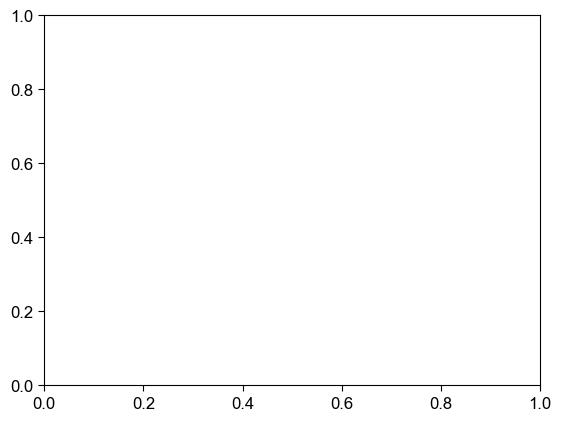

In [28]:
ax = sns.lineplot(data=ds[ds["class"] == "kernel"], 
                  x="l2", y="rmse", 
             hue="alpha", palette="rainbow", markers=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


ax = sns.lineplot(data=ds[ds["class"] == "opt"], 
                  x="l2", y="rmse", c="k",
             markers=True)

plt.xlabel("$\lambda$", fontsize=20)
plt.ylabel("RMSE\n[(kcal/mol)/$e$]", fontsize=20)
plt.ylim(0,1)
plt.tight_layout()

In [29]:
key1s = []
key2s = []
alphas = []
lambdas = []
split = []
rmse1 = []
rmse2 = []

for _ in list(set(ds["_"])):
    row = ds[ds["_"] == _]
    alphas.append(row["alpha"].mean())
    lambdas.append(row["l2"].mean())
    l = list(row["key"])

    if l[0].startswith("kernel_"):
        key1s.append(l[0])
        key2s.append(l[1])
        TEST1 = csv_dict[l[0]][csv_dict[l[0]]["class"] == "test" ]
        TEST2 = csv_dict[l[1]][csv_dict[l[1]]["class"] == "test" ]
        rmse1.append(TEST1["rmse"].median())
        rmse2.append(TEST2["rmse"].median())
        assert len(TEST1) == len(TEST2)
        split.append(len(TEST1))
    else:
        key1s.append(l[1])
        key2s.append(l[0])
        TEST1 = csv_dict[l[1]][csv_dict[l[1]]["class"] == "test" ]
        TEST2 = csv_dict[l[0]][csv_dict[l[0]]["class"] == "test" ]
        rmse1.append(TEST1["rmse"].median())
        rmse2.append(TEST2["rmse"].median())
        assert len(TEST1) == len(TEST2)
        split.append(len(TEST1))
        


AssertionError: 

#  Paired Dataframe

In [30]:
ALPHA = "$\\alpha$"
LAMBDA = "$\lambda$"
ds_paired = pd.DataFrame({"key1": key1s, 
              "key2": key2s, 
              "split": split,
            "rmse1": rmse1,
            "rmse2":rmse2,
              ALPHA: alphas,
             LAMBDA: lambdas})

ds_paired["split"].unique()

ValueError: All arrays must be of the same length

In [31]:
ds_paired.sort_values("rmse1")

NameError: name 'ds_paired' is not defined

In [32]:
def rmse_plot():
    ax = sns.lineplot(data=ds_paired, 
                      x=LAMBDA, y="rmse1", 
                 hue=ALPHA, palette="rainbow", markers=True)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax = sns.lineplot(data=ds_paired, 
                      x=LAMBDA, y="rmse2", markers=True,c="gray")
    plt.tight_layout()
    plt.axhline(standard.rmses.median(), c="k", linestyle="--")
    plt.axhline(ds_paired.rmse2.median(), c="gray", linestyle="--")
    plt.ylim(0, 0.82)
    plt.xlabel(LAMBDA, fontsize=20)
    plt.ylabel(RMSELABEL, fontsize=20)
    plt.savefig("median_RMSE_summary.pdf", bbox_inches = "tight")

In [33]:
ds_paired1 = ds_paired.sort_values([ALPHA, LAMBDA, "split"]).copy()
ds_paired1 = ds_paired1[ds_paired1["split"] == 126]
ds_paired1 = ds_paired1[ds_paired1[ALPHA] == 0.]
ds_paired1 = ds_paired1[ds_paired1[LAMBDA] < 1.1]
bricks1 = [get_brick(row) for row in ds_paired1.iterrows()]
for _ in bricks1:
    _.set_ylim(0.25,1.5)
combined1 = bricks1[0] | bricks1[1] | bricks1[2] | bricks1[3]
combined1

NameError: name 'ds_paired' is not defined

In [34]:
ds_paired2 = ds_paired.sort_values([ALPHA, LAMBDA, "split"]).copy()
ds_paired2 = ds_paired2[ds_paired2["split"] == 126]
ds_paired2 = ds_paired2[ds_paired2[ALPHA] == 0.5]
ds_paired2 = ds_paired2[ds_paired2[LAMBDA] < 1.1]
bricks2 = [get_brick(row) for row in ds_paired2.iterrows()]
for _ in bricks2:
    _.set_ylim(0.25,1.5)
combined2 = bricks2[0] | bricks2[1] | bricks2[2] | bricks2[3]
combined2

NameError: name 'ds_paired' is not defined

In [35]:
group = (combined1 / combined2)
group.savefig("combined_fig_126.pdf")

NameError: name 'combined1' is not defined

#  distributions

In [36]:
standard, headers = prepare_standard(csv_dict["standard_"])
fig1 = plot(standard, headers, color_key="dip")

plot_angle(standard)
standard.describe()

FileNotFoundError: [Errno 2] No such file or directory: '/home/boittier/Documents/phd/ff_energy/ff_energy/pydcm/tests/pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaussian_64_dcm_pbe0_adz_esp.pkl'

In [373]:
k1 = ds_paired["key1"][0]
k2 = ds_paired["key2"][0]

,Unnamed: 0,rmse,alpha,l2,rmse_norm,c1a,c1b,c1c,c1q,c2a,...,c7b,c7c,c7q,c8a,c8b,c8c,c8q,dip,a102,dip_norm
count,140.0000,140.000000,140.0,1.400000e+02,140.000000,140.000000,140.000000,140.000000,1.400000e+02,140.000000,...,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000
mean,69.5000,0.935138,0.0,1.000000e-01,12.865909,0.189446,-0.016212,0.474976,-9.999988e-01,0.156978,...,-0.013468,0.795557,5.287823e-02,0.212018,0.096479,0.686317,5.287823e-02,1.652545,111.760962,0.849201
std,40.5586,0.716719,0.0,2.785524e-17,9.860832,0.111654,0.118261,0.091072,1.114209e-16,0.117066,...,0.394564,0.598187,6.963809e-18,0.250352,0.764986,0.169907,6.963809e-18,0.093182,3.938318,0.047884
min,0.0000,0.501081,0.0,1.000000e-01,6.894017,-0.352394,-1.137152,-0.152375,-9.999988e-01,-0.503479,...,-2.945526,-1.350830,5.287823e-02,-1.621521,-0.882988,-0.464642,5.287823e-02,1.430970,103.999958,0.735339
25%,34.7500,0.647444,0.0,1.000000e-01,8.907733,0.178858,-0.002153,0.451329,-9.999988e-01,0.132406,...,-0.064651,0.638977,5.287823e-02,0.204639,-0.029352,0.630657,5.287823e-02,1.589552,109.999989,0.816830
50%,69.5000,0.759613,0.0,1.000000e-01,10.450981,0.189352,-0.000922,0.491628,-9.999988e-01,0.163462,...,-0.004379,0.710968,5.287823e-02,0.259220,0.005836,0.693721,5.287823e-02,1.677450,112.560069,0.861999
75%,104.2500,0.904229,0.0,1.000000e-01,12.440658,0.201751,0.000014,0.523022,-9.999988e-01,0.181332,...,0.062550,0.809082,5.287823e-02,0.298613,0.094347,0.764622,5.287823e-02,1.694437,113.285961,0.870728
max,139.0000,5.451256,0.0,1.000000e-01,75.000000,0.944122,0.069666,0.592448,-9.999988e-01,0.856461,...,1.469376,4.472046,5.287823e-02,0.884590,7.299171,1.086664,5.287823e-02,1.946000,122.995512,1.000000


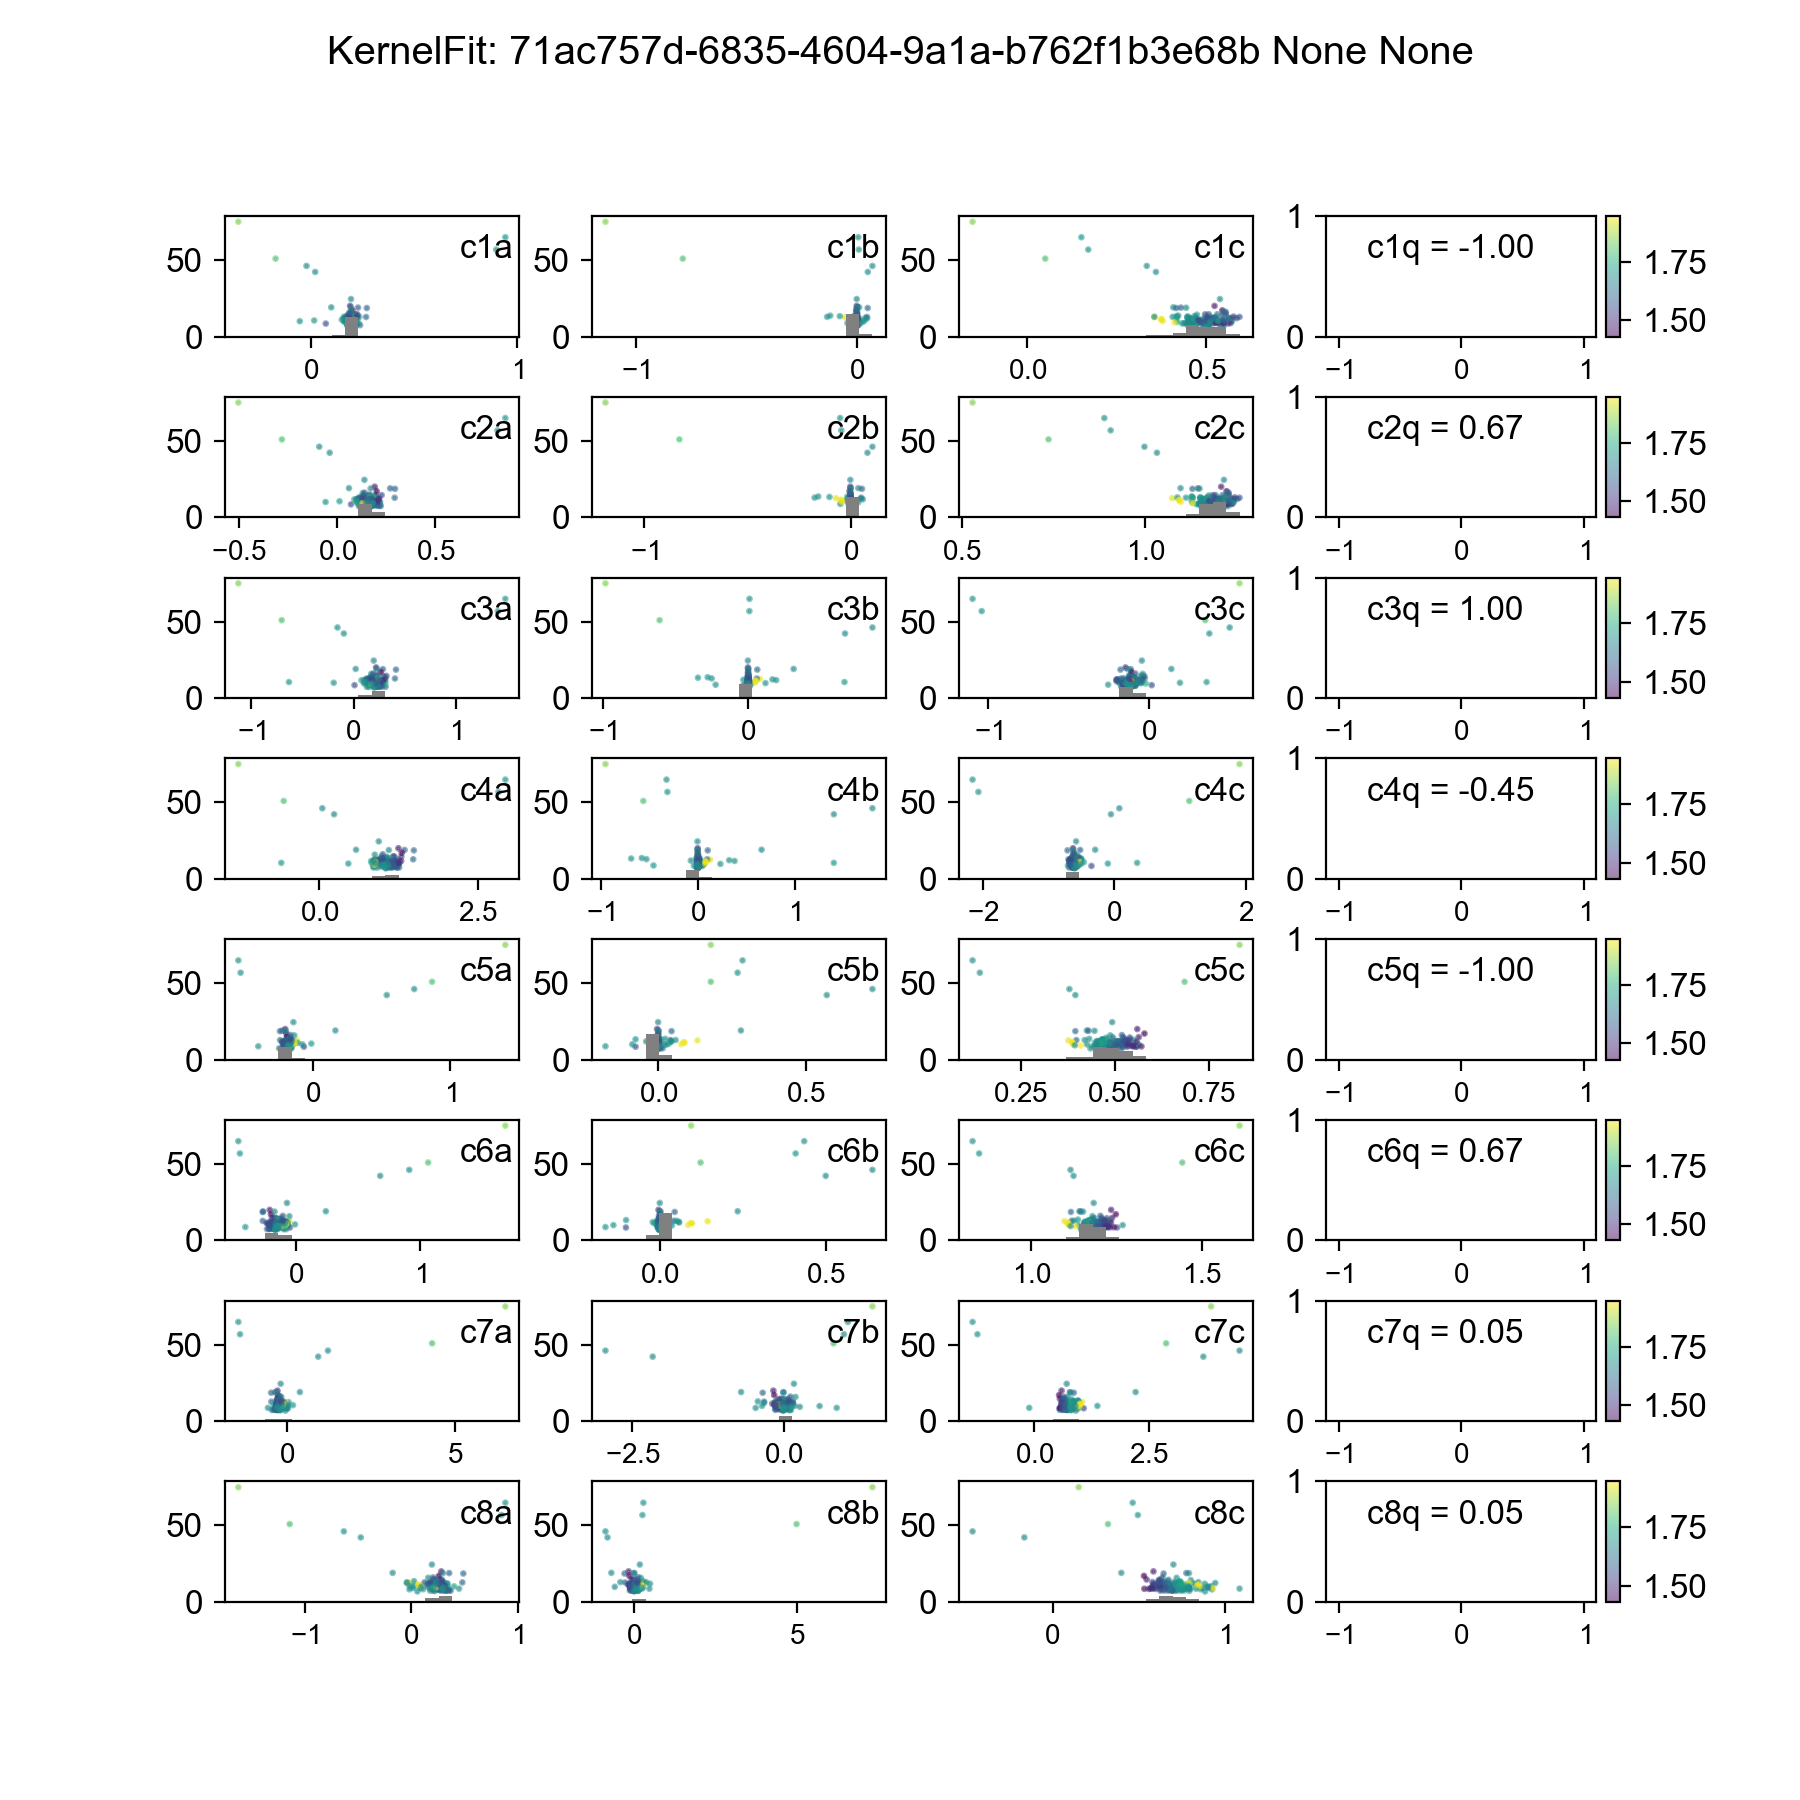

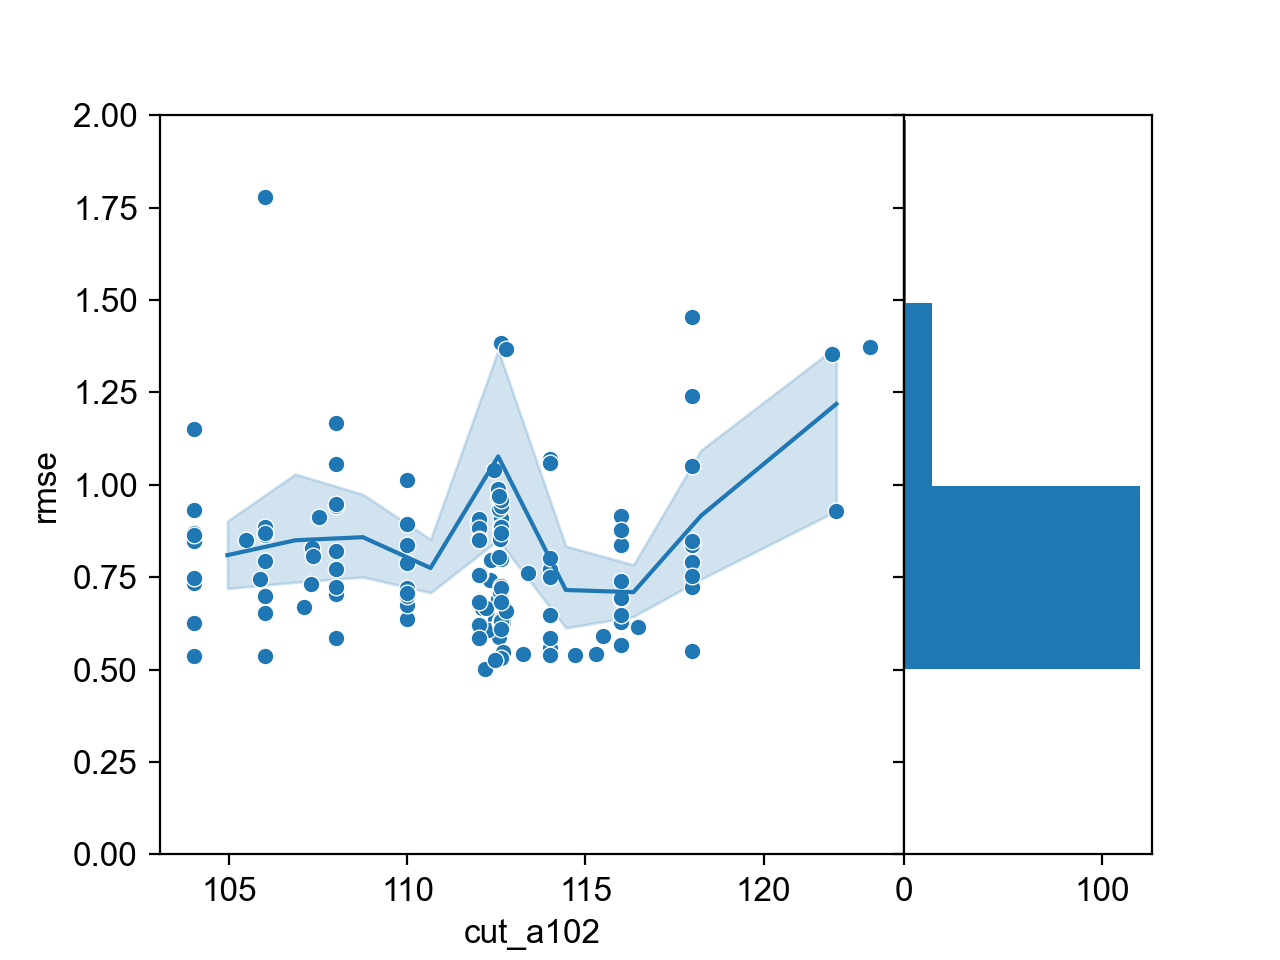

In [374]:
standard, headers = prepare_standard(csv_dict[k1])
fig2 = plot(standard, headers, color_key="dip")

plot_angle(standard)
standard.describe()

,Unnamed: 0,rmse,alpha,l2,rmse_norm,c1a,c1b,c1c,c1q,c2a,...,c7b,c7c,c7q,c8a,c8b,c8c,c8q,dip,a102,dip_norm
count,140.0000,140.000000,140.0,1.400000e+02,140.000000,140.000000,140.000000,140.000000,1.400000e+02,140.000000,...,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000
mean,69.5000,0.507113,0.0,1.000000e-01,71.663185,0.189446,-0.016212,0.474976,-9.999988e-01,0.156978,...,-0.013468,0.795557,5.287823e-02,0.212018,0.096479,0.686317,5.287823e-02,1.652545,111.760962,0.849201
std,40.5586,0.008932,0.0,2.785524e-17,1.262258,0.111654,0.118261,0.091072,1.114209e-16,0.117066,...,0.394564,0.598187,6.963809e-18,0.250352,0.764986,0.169907,6.963809e-18,0.093182,3.938318,0.047884
min,0.0000,0.476151,0.0,1.000000e-01,67.287778,-0.352394,-1.137152,-0.152375,-9.999988e-01,-0.503479,...,-2.945526,-1.350830,5.287823e-02,-1.621521,-0.882988,-0.464642,5.287823e-02,1.430970,103.999958,0.735339
25%,34.7500,0.499975,0.0,1.000000e-01,70.654446,0.178858,-0.002153,0.451329,-9.999988e-01,0.132406,...,-0.064651,0.638977,5.287823e-02,0.204639,-0.029352,0.630657,5.287823e-02,1.589552,109.999989,0.816830
50%,69.5000,0.509168,0.0,1.000000e-01,71.953476,0.189352,-0.000922,0.491628,-9.999988e-01,0.163462,...,-0.004379,0.710968,5.287823e-02,0.259220,0.005836,0.693721,5.287823e-02,1.677450,112.560069,0.861999
75%,104.2500,0.513853,0.0,1.000000e-01,72.615544,0.201751,0.000014,0.523022,-9.999988e-01,0.181332,...,0.062550,0.809082,5.287823e-02,0.298613,0.094347,0.764622,5.287823e-02,1.694437,113.285961,0.870728
max,139.0000,0.530726,0.0,1.000000e-01,75.000000,0.944122,0.069666,0.592448,-9.999988e-01,0.856461,...,1.469376,4.472046,5.287823e-02,0.884590,7.299171,1.086664,5.287823e-02,1.946000,122.995512,1.000000


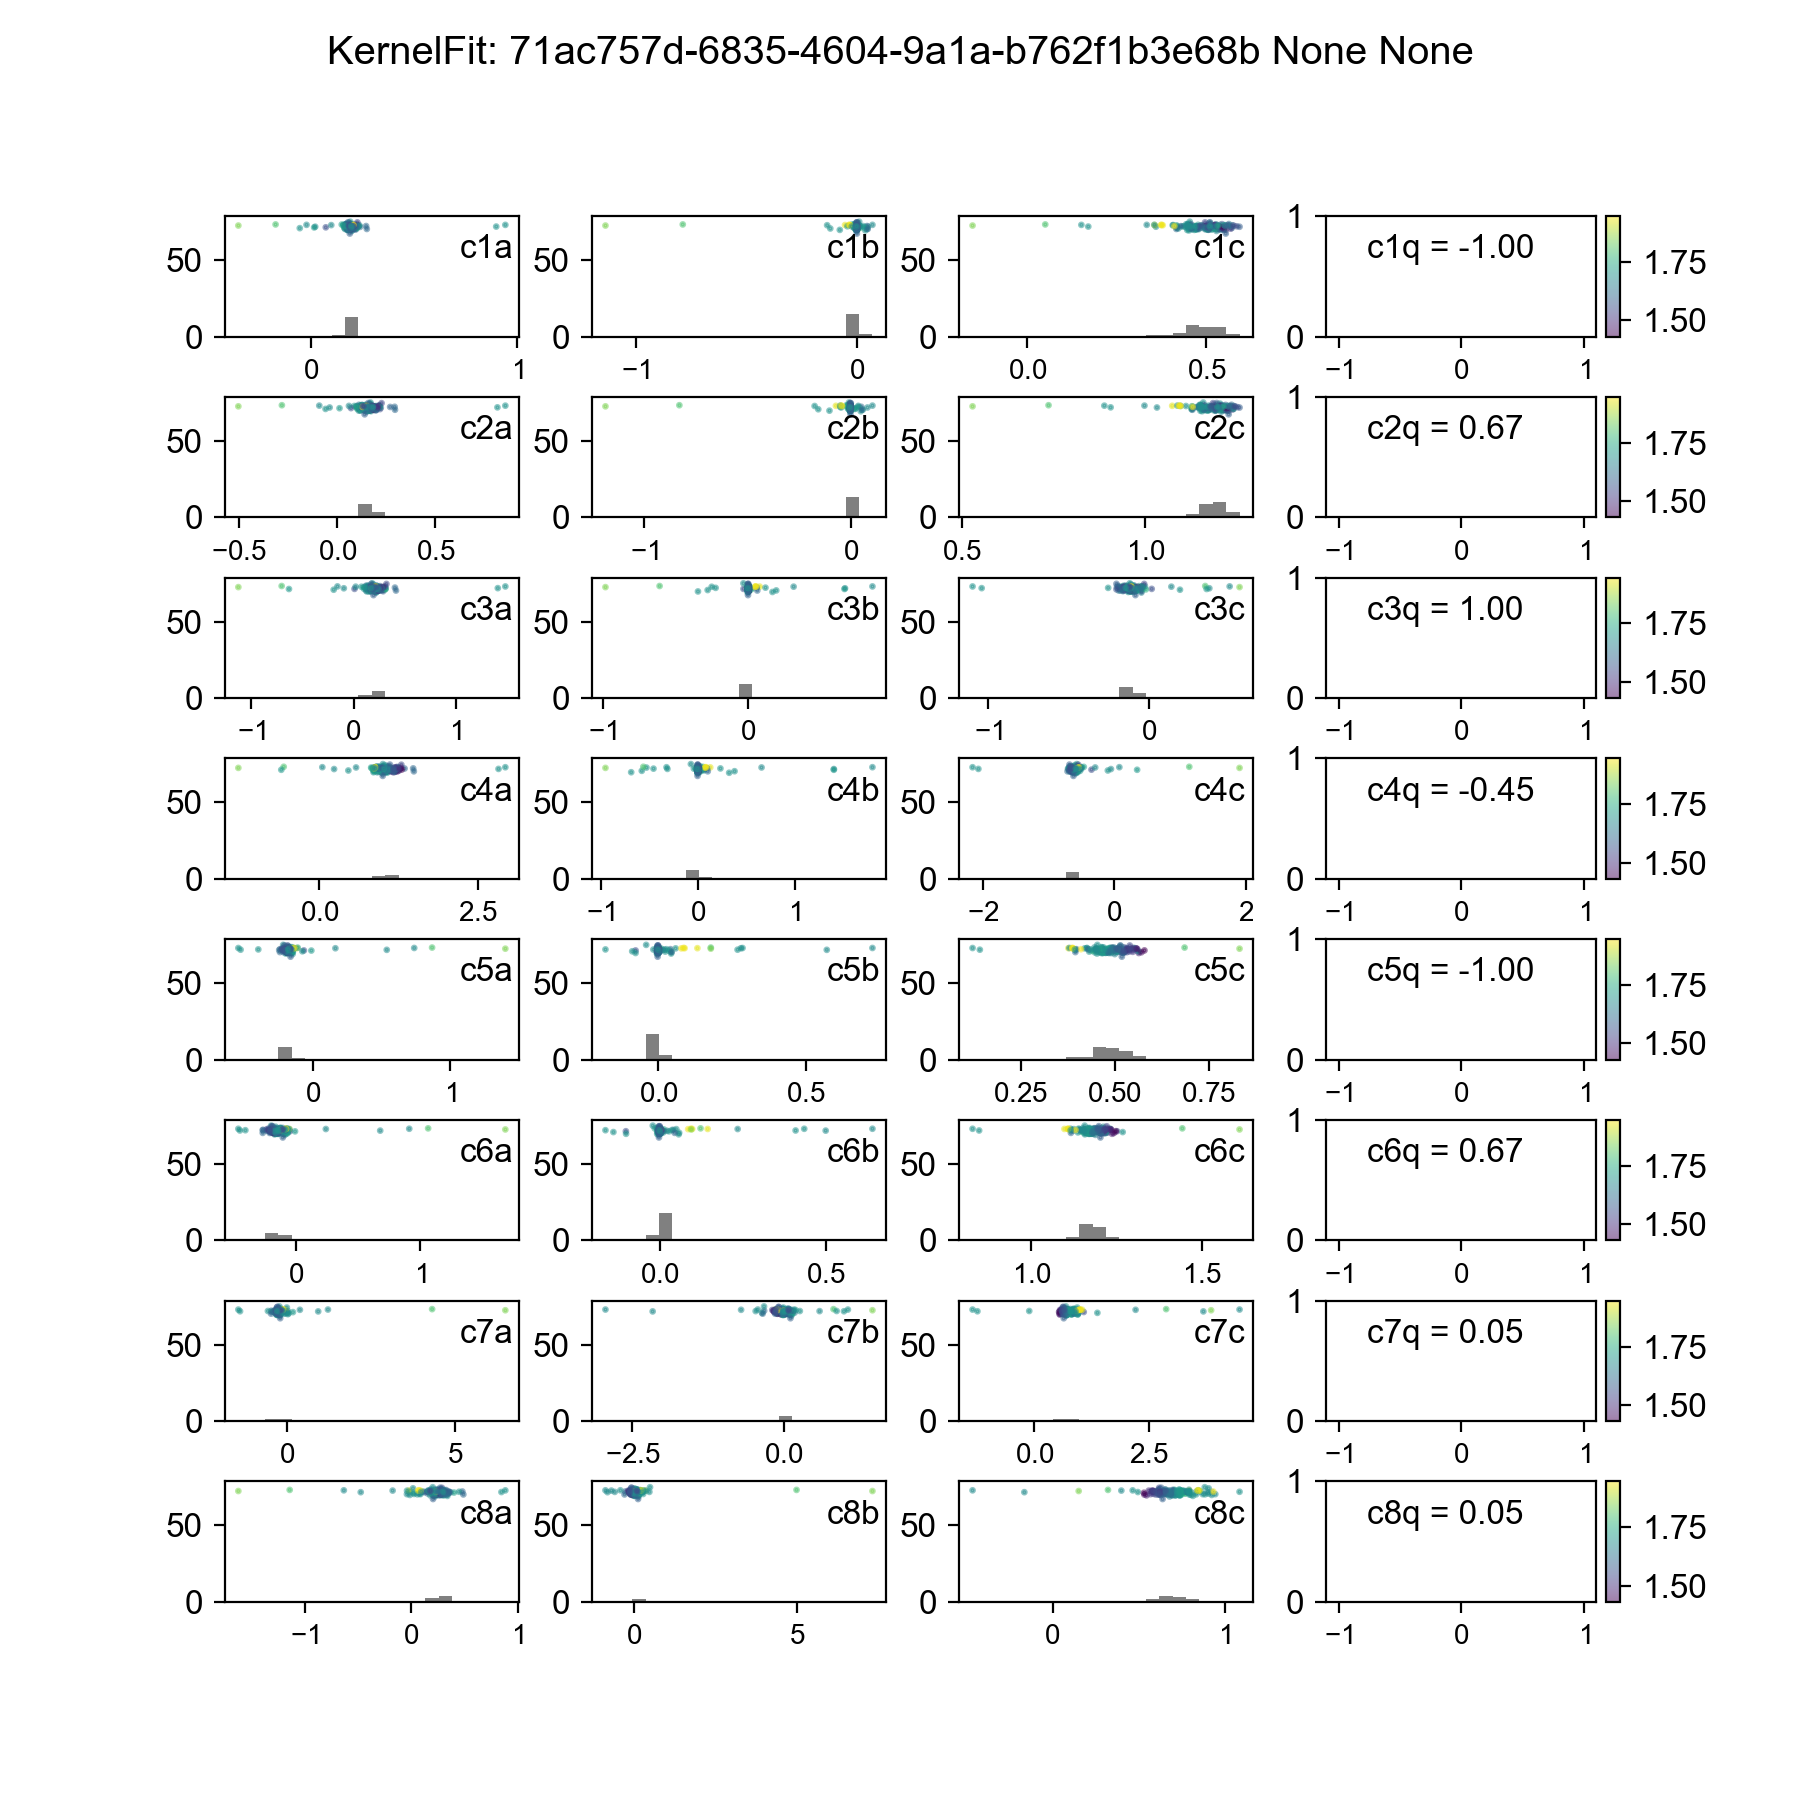

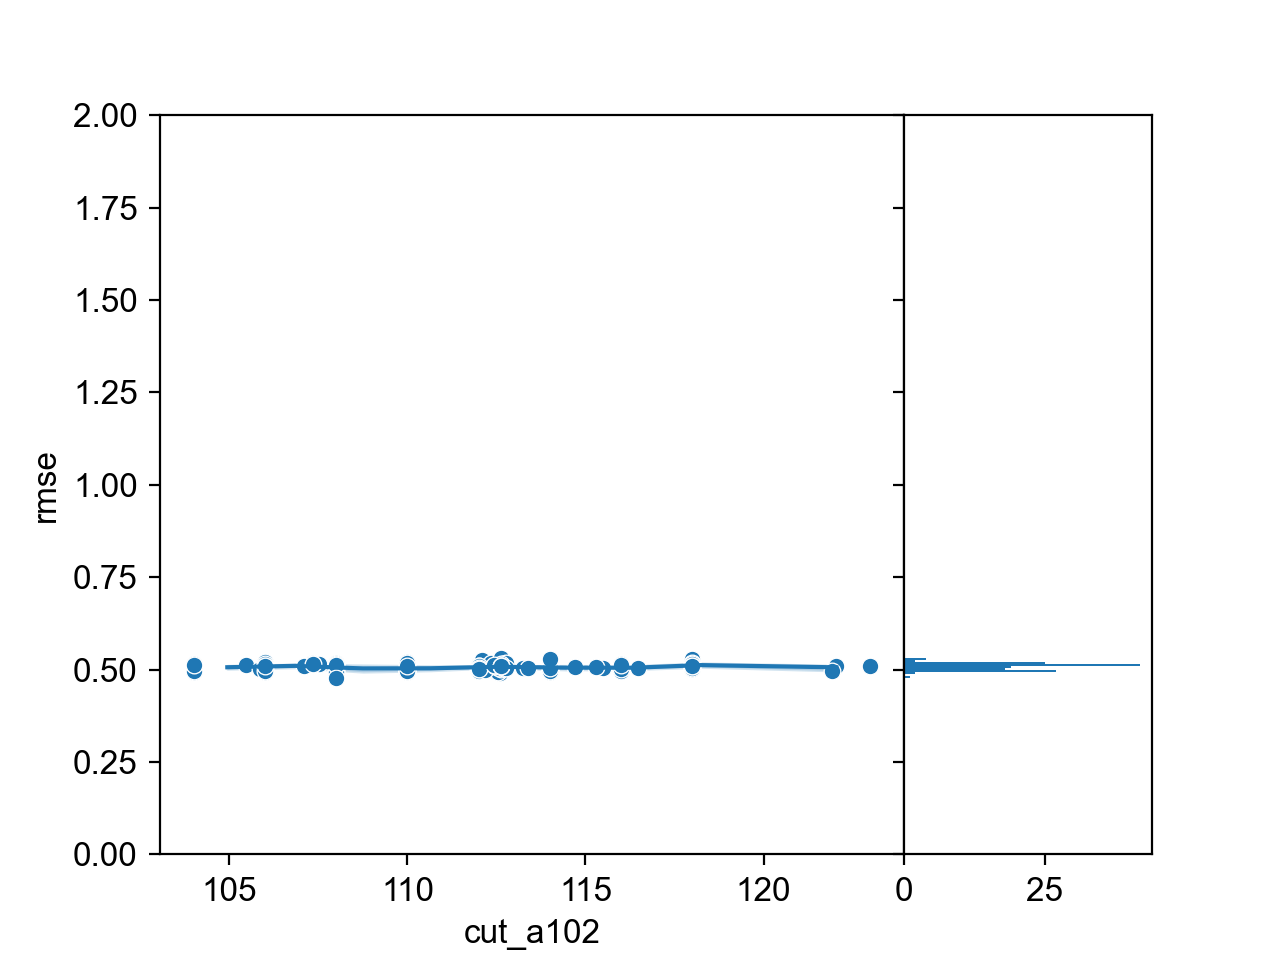

In [375]:
standard, headers = prepare_standard(csv_dict[k2])
fig3 = plot(standard, headers, color_key="dip")

plot_angle(standard)
standard.describe()

In [376]:
standard.describe()

,Unnamed: 0,rmse,alpha,l2,rmse_norm,c1a,c1b,c1c,c1q,c2a,...,c7b,c7c,c7q,c8a,c8b,c8c,c8q,dip,a102,dip_norm
count,140.0000,140.000000,140.0,1.400000e+02,140.000000,140.000000,140.000000,140.000000,1.400000e+02,140.000000,...,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000
mean,69.5000,0.507113,0.0,1.000000e-01,71.663185,0.189446,-0.016212,0.474976,-9.999988e-01,0.156978,...,-0.013468,0.795557,5.287823e-02,0.212018,0.096479,0.686317,5.287823e-02,1.652545,111.760962,0.849201
std,40.5586,0.008932,0.0,2.785524e-17,1.262258,0.111654,0.118261,0.091072,1.114209e-16,0.117066,...,0.394564,0.598187,6.963809e-18,0.250352,0.764986,0.169907,6.963809e-18,0.093182,3.938318,0.047884
min,0.0000,0.476151,0.0,1.000000e-01,67.287778,-0.352394,-1.137152,-0.152375,-9.999988e-01,-0.503479,...,-2.945526,-1.350830,5.287823e-02,-1.621521,-0.882988,-0.464642,5.287823e-02,1.430970,103.999958,0.735339
25%,34.7500,0.499975,0.0,1.000000e-01,70.654446,0.178858,-0.002153,0.451329,-9.999988e-01,0.132406,...,-0.064651,0.638977,5.287823e-02,0.204639,-0.029352,0.630657,5.287823e-02,1.589552,109.999989,0.816830
50%,69.5000,0.509168,0.0,1.000000e-01,71.953476,0.189352,-0.000922,0.491628,-9.999988e-01,0.163462,...,-0.004379,0.710968,5.287823e-02,0.259220,0.005836,0.693721,5.287823e-02,1.677450,112.560069,0.861999
75%,104.2500,0.513853,0.0,1.000000e-01,72.615544,0.201751,0.000014,0.523022,-9.999988e-01,0.181332,...,0.062550,0.809082,5.287823e-02,0.298613,0.094347,0.764622,5.287823e-02,1.694437,113.285961,0.870728
max,139.0000,0.530726,0.0,1.000000e-01,75.000000,0.944122,0.069666,0.592448,-9.999988e-01,0.856461,...,1.469376,4.472046,5.287823e-02,0.884590,7.299171,1.086664,5.287823e-02,1.946000,122.995512,1.000000


In [379]:
standard["pkl"][0]

'pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/test_nms_49_5.xyz_esp.pkl'

In [388]:
k1 = "opt_835d815f-b65e-4653-bdb8-f93bfeae1c43_1.0"
k2 = "kernel_835d815f-b65e-4653-bdb8-f93bfeae1c43_1.0"

k1 = ds_paired["key1"][0]
k2 = ds_paired["key2"][0]

In [390]:
k1, k2

('kernel_1066ff5c-01cb-4606-a5c8-a60934056d07_0.0_0.1',
 'opt_1066ff5c-01cb-4606-a5c8-a60934056d07_0.1')

,Unnamed: 0,rmse,alpha,l2,rmse_norm,c1a,c1b,c1c,c1q,c2a,...,c7b,c7c,c7q,c8a,c8b,c8c,c8q,dip,a102,dip_norm
count,140.0000,140.000000,140.0,1.400000e+02,140.000000,140.000000,140.000000,140.000000,1.400000e+02,140.000000,...,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000
mean,69.5000,0.935138,0.0,1.000000e-01,12.865909,0.189446,-0.016212,0.474976,-9.999988e-01,0.156978,...,-0.013468,0.795557,5.287823e-02,0.212018,0.096479,0.686317,5.287823e-02,1.652545,111.760962,0.849201
std,40.5586,0.716719,0.0,2.785524e-17,9.860832,0.111654,0.118261,0.091072,1.114209e-16,0.117066,...,0.394564,0.598187,6.963809e-18,0.250352,0.764986,0.169907,6.963809e-18,0.093182,3.938318,0.047884
min,0.0000,0.501081,0.0,1.000000e-01,6.894017,-0.352394,-1.137152,-0.152375,-9.999988e-01,-0.503479,...,-2.945526,-1.350830,5.287823e-02,-1.621521,-0.882988,-0.464642,5.287823e-02,1.430970,103.999958,0.735339
25%,34.7500,0.647444,0.0,1.000000e-01,8.907733,0.178858,-0.002153,0.451329,-9.999988e-01,0.132406,...,-0.064651,0.638977,5.287823e-02,0.204639,-0.029352,0.630657,5.287823e-02,1.589552,109.999989,0.816830
50%,69.5000,0.759613,0.0,1.000000e-01,10.450981,0.189352,-0.000922,0.491628,-9.999988e-01,0.163462,...,-0.004379,0.710968,5.287823e-02,0.259220,0.005836,0.693721,5.287823e-02,1.677450,112.560069,0.861999
75%,104.2500,0.904229,0.0,1.000000e-01,12.440658,0.201751,0.000014,0.523022,-9.999988e-01,0.181332,...,0.062550,0.809082,5.287823e-02,0.298613,0.094347,0.764622,5.287823e-02,1.694437,113.285961,0.870728
max,139.0000,5.451256,0.0,1.000000e-01,75.000000,0.944122,0.069666,0.592448,-9.999988e-01,0.856461,...,1.469376,4.472046,5.287823e-02,0.884590,7.299171,1.086664,5.287823e-02,1.946000,122.995512,1.000000


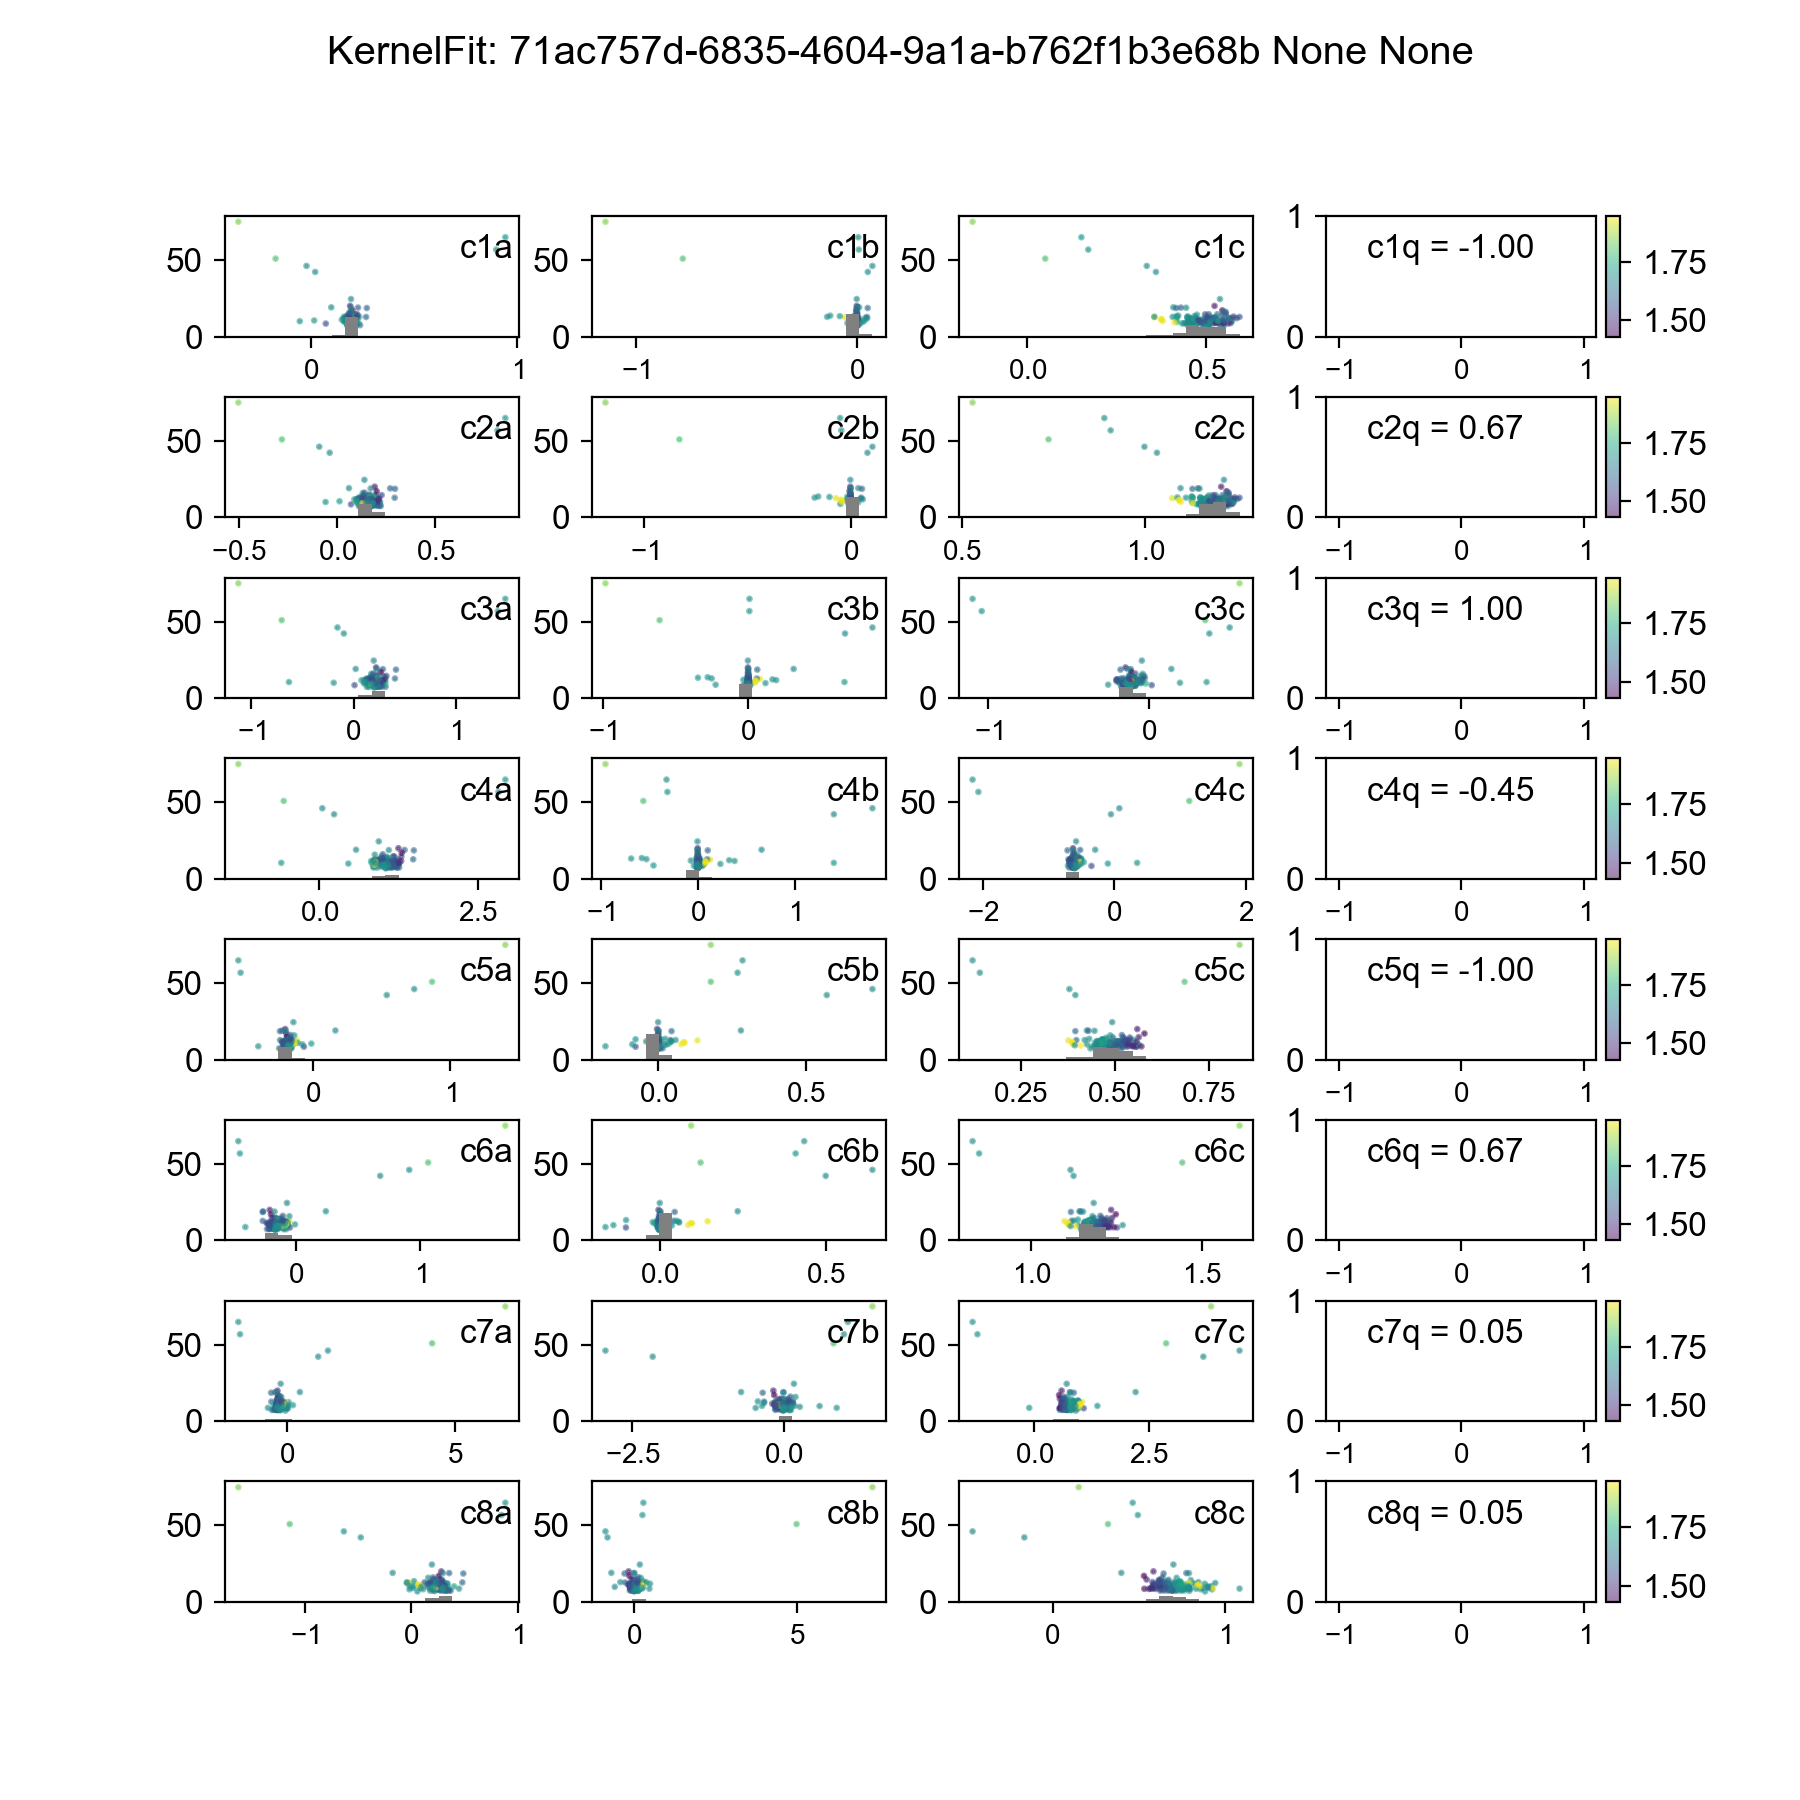

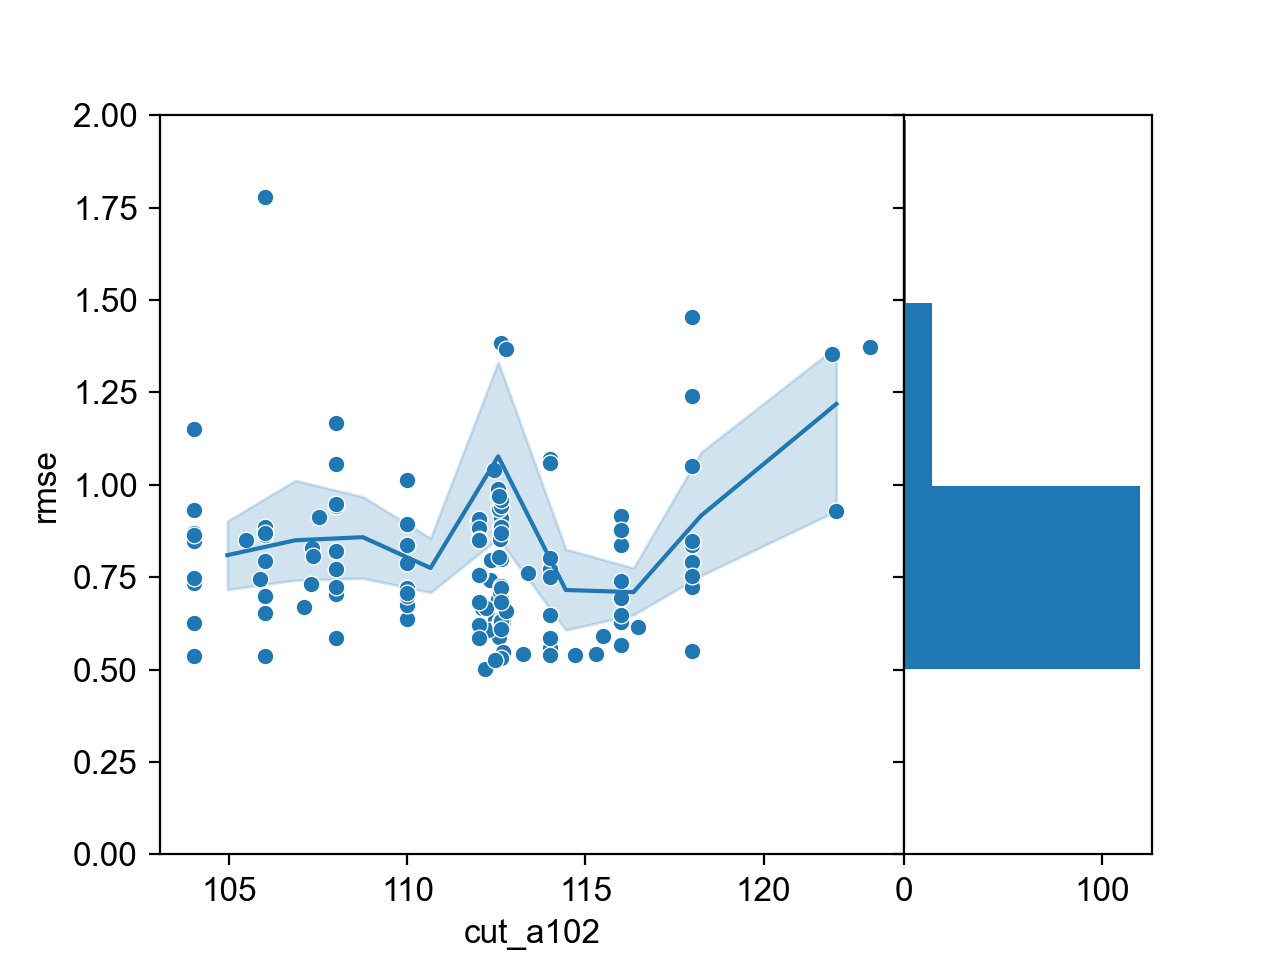

In [394]:
standard, headers = prepare_standard(csv_dict[k1])
fig3 = plot(standard, headers, color_key="dip")

plot_angle(standard)
standard.describe()

,Unnamed: 0,rmse,alpha,l2,rmse_norm,c1a,c1b,c1c,c1q,c2a,...,c7b,c7c,c7q,c8a,c8b,c8c,c8q,dip,a102,dip_norm
count,140.0000,140.000000,140.0,1.400000e+02,140.000000,140.000000,140.000000,140.000000,1.400000e+02,140.000000,...,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000
mean,69.5000,0.507113,0.0,1.000000e-01,71.663185,0.189446,-0.016212,0.474976,-9.999988e-01,0.156978,...,-0.013468,0.795557,5.287823e-02,0.212018,0.096479,0.686317,5.287823e-02,1.652545,111.760962,0.849201
std,40.5586,0.008932,0.0,2.785524e-17,1.262258,0.111654,0.118261,0.091072,1.114209e-16,0.117066,...,0.394564,0.598187,6.963809e-18,0.250352,0.764986,0.169907,6.963809e-18,0.093182,3.938318,0.047884
min,0.0000,0.476151,0.0,1.000000e-01,67.287778,-0.352394,-1.137152,-0.152375,-9.999988e-01,-0.503479,...,-2.945526,-1.350830,5.287823e-02,-1.621521,-0.882988,-0.464642,5.287823e-02,1.430970,103.999958,0.735339
25%,34.7500,0.499975,0.0,1.000000e-01,70.654446,0.178858,-0.002153,0.451329,-9.999988e-01,0.132406,...,-0.064651,0.638977,5.287823e-02,0.204639,-0.029352,0.630657,5.287823e-02,1.589552,109.999989,0.816830
50%,69.5000,0.509168,0.0,1.000000e-01,71.953476,0.189352,-0.000922,0.491628,-9.999988e-01,0.163462,...,-0.004379,0.710968,5.287823e-02,0.259220,0.005836,0.693721,5.287823e-02,1.677450,112.560069,0.861999
75%,104.2500,0.513853,0.0,1.000000e-01,72.615544,0.201751,0.000014,0.523022,-9.999988e-01,0.181332,...,0.062550,0.809082,5.287823e-02,0.298613,0.094347,0.764622,5.287823e-02,1.694437,113.285961,0.870728
max,139.0000,0.530726,0.0,1.000000e-01,75.000000,0.944122,0.069666,0.592448,-9.999988e-01,0.856461,...,1.469376,4.472046,5.287823e-02,0.884590,7.299171,1.086664,5.287823e-02,1.946000,122.995512,1.000000


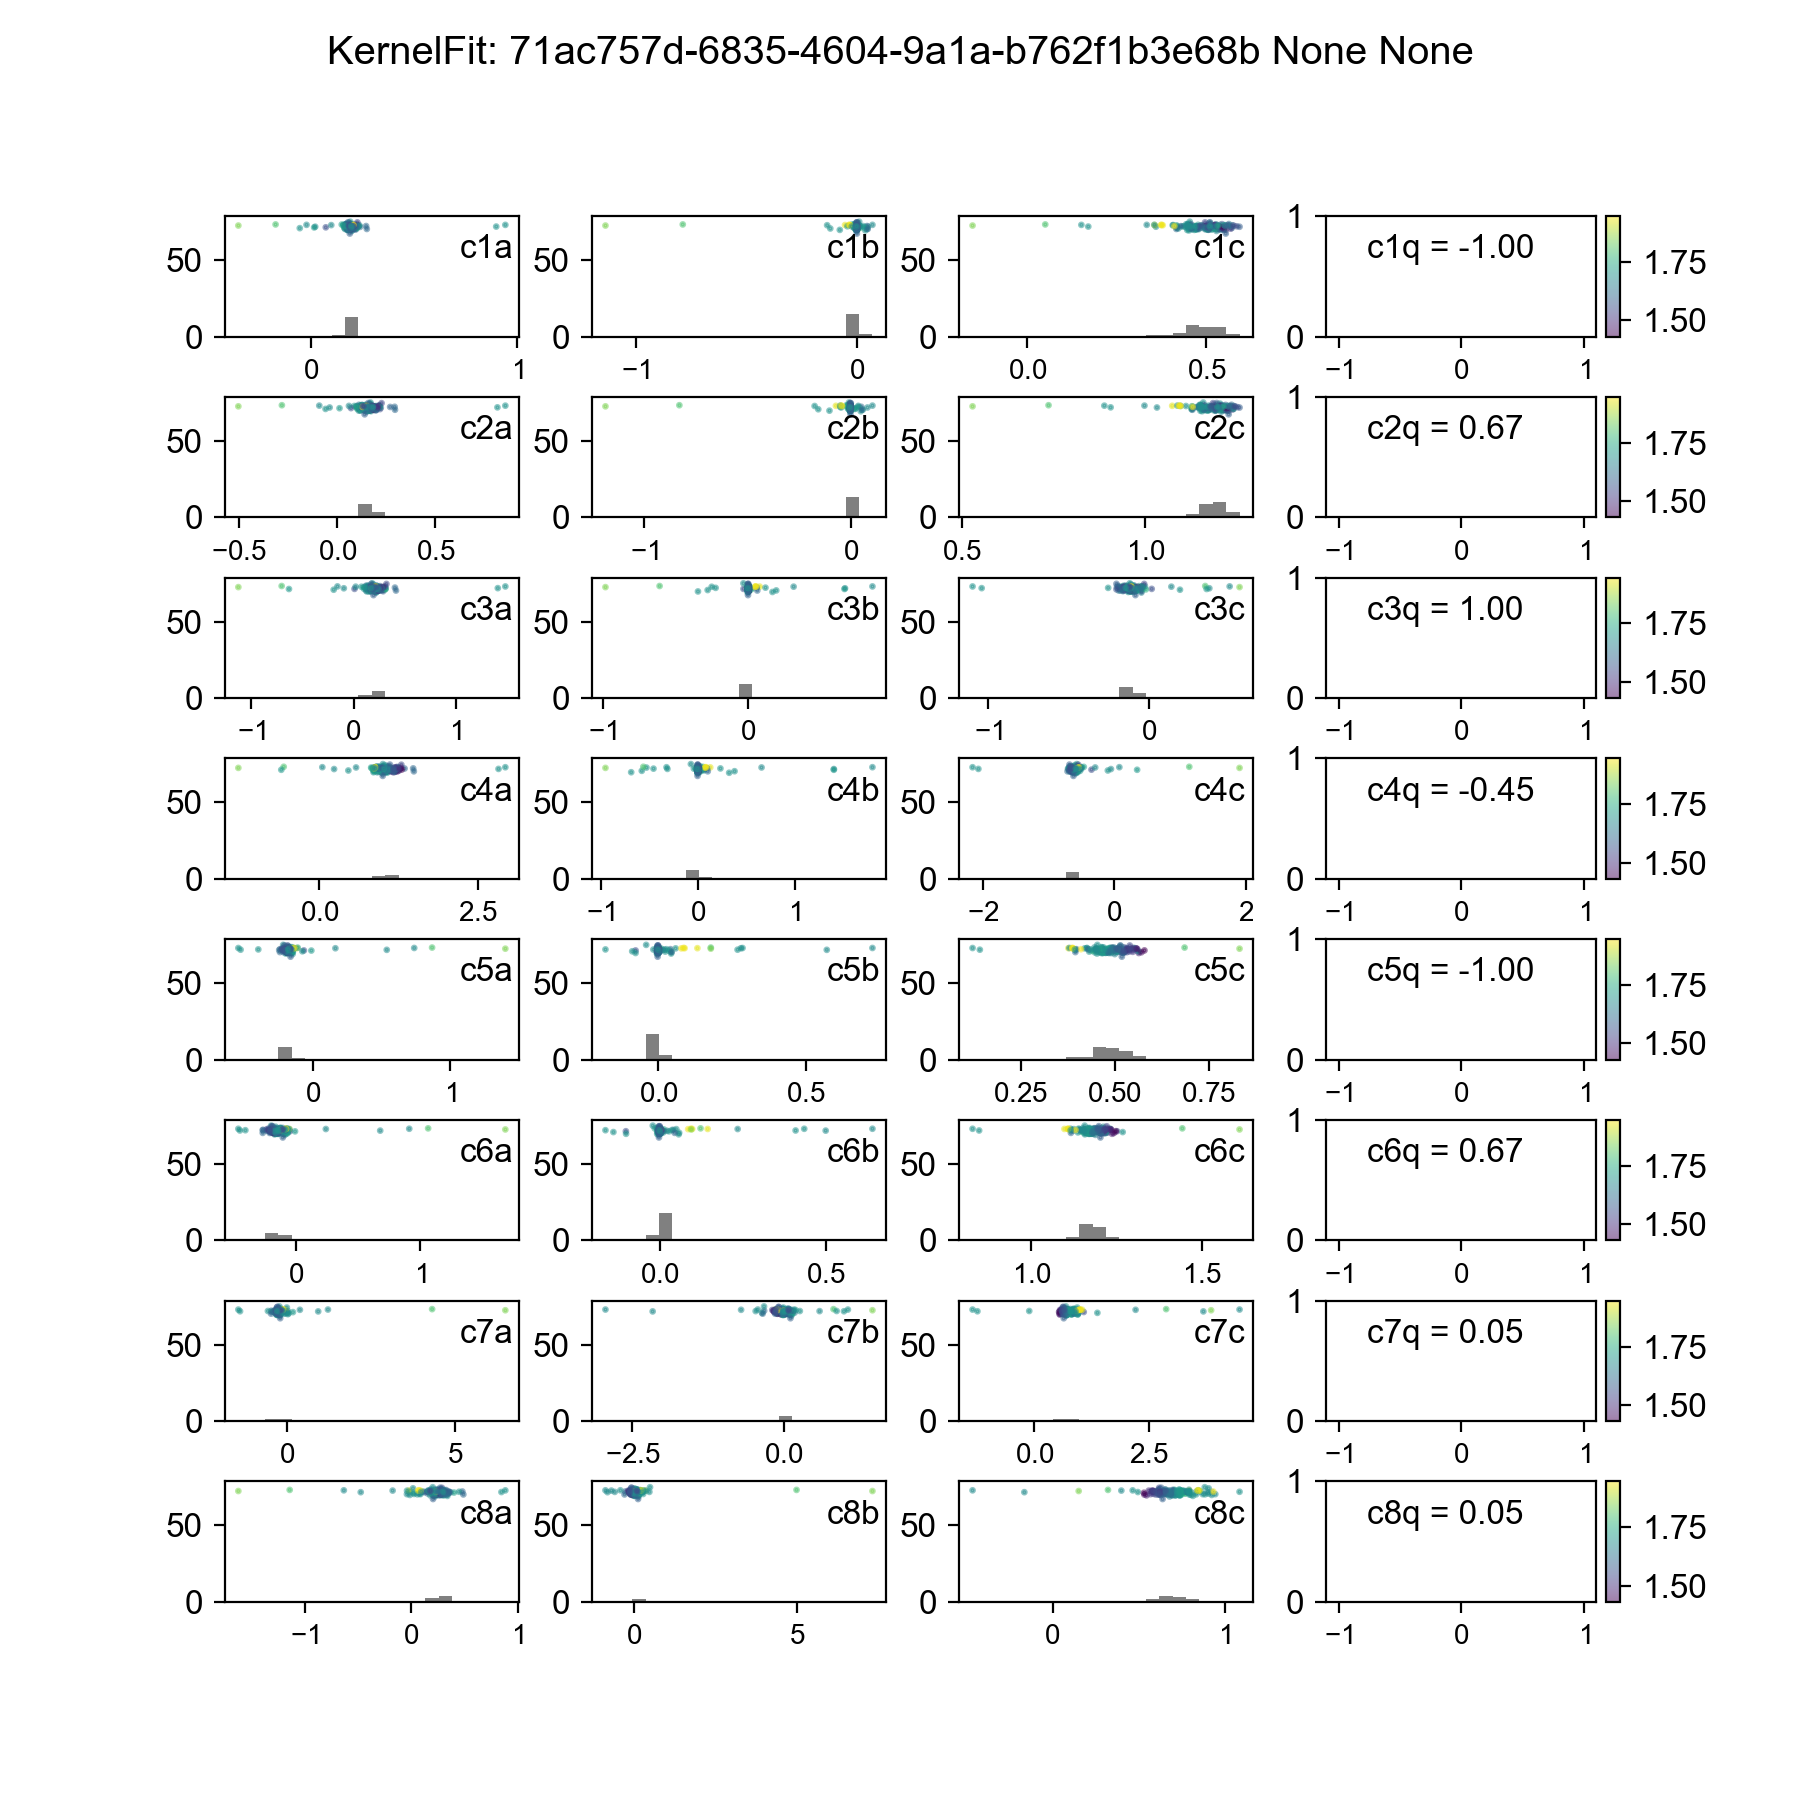

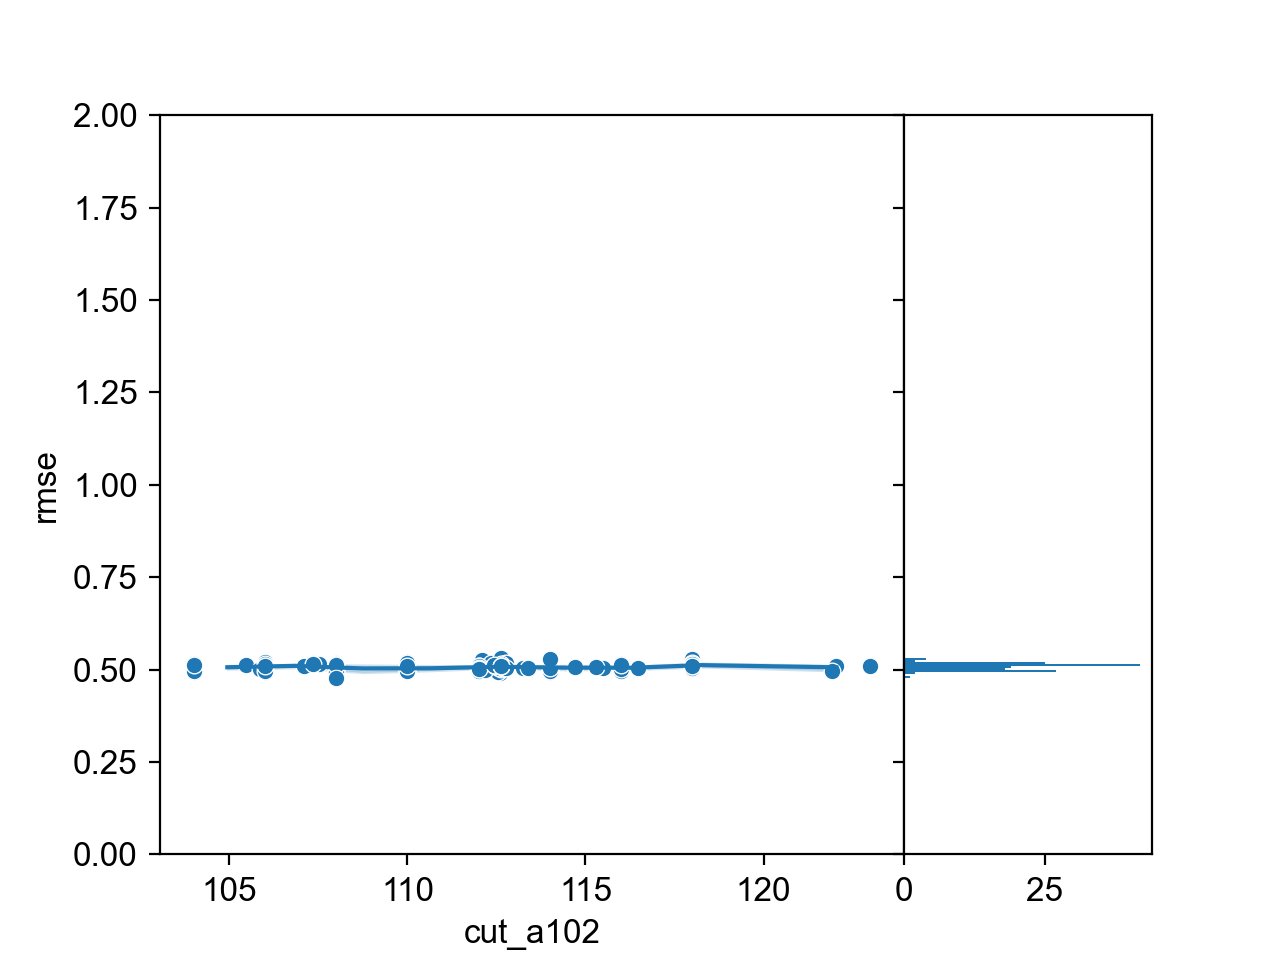

In [393]:
standard, headers = prepare_standard(csv_dict[k2])
fig3 = plot(standard, headers, color_key="dip")

plot_angle(standard)
standard.describe()

In [395]:
pca_df

,0,1,cosin_angle,fn
0,-0.055748,0.029722,1.080981,gaussian_64_dcm_pbe0_adz_esp
1,0.112633,0.045923,1.183651,gaussian_10_dcm_pbe0_adz_esp
2,-0.107361,-0.004960,1.524626,gaussian_7_dcm_pbe0_adz_esp
3,0.243239,-0.065555,1.307544,test_nms_46_6
4,-0.099882,0.006159,1.509212,gaussian_49_dcm_pbe0_adz_esp
...,...,...,...,...
135,0.086896,-0.061049,0.958361,gaussian_63_dcm_pbe0_adz_esp
136,0.178537,-0.107928,1.027063,test_nms_11_3
137,-0.292100,0.114933,1.195929,gaussian_39_dcm_pbe0_adz_esp
138,0.028500,0.037475,0.650179,test_nms_19_4


In [396]:
standard

,Unnamed: 0,rmse,pkl,class,alpha,uuid,l2,type,rmse_norm,filename,...,c7c,c7q,c8a,c8b,c8c,c8q,dip,a102,dip_norm,cut_a102
0,0,0.798816,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/test...,test,0.0,1066ff5c-01cb-4606-a5c8-a60934056d07,0.1,nms,10.990354,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/test...,...,0.809906,0.052878,0.297424,0.094254,0.741072,0.052878,1.694939,112.619613,0.870986,112.5480
1,1,1.068850,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,train,0.0,1066ff5c-01cb-4606-a5c8-a60934056d07,0.1,scan,14.705555,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,...,0.552429,0.052878,0.214317,-0.040100,0.546511,0.052878,1.476504,113.999978,0.758738,114.4475
2,2,0.851998,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/test...,train,0.0,1066ff5c-01cb-4606-a5c8-a60934056d07,0.1,nms,11.722042,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/test...,...,0.782043,0.052878,0.235588,0.003815,0.774912,0.052878,1.767800,105.468765,0.908428,104.9405
3,3,1.012091,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,train,0.0,1066ff5c-01cb-4606-a5c8-a60934056d07,0.1,scan,13.924650,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,...,0.608459,0.052878,0.224281,0.083115,0.617495,0.052878,1.567951,110.000007,0.805730,110.6485
4,4,1.039381,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/test...,train,0.0,1066ff5c-01cb-4606-a5c8-a60934056d07,0.1,nms,14.300111,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/test...,...,0.808807,0.052878,0.209785,-0.002846,0.803741,0.052878,1.691400,112.422672,0.869168,112.5480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,135,0.838332,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,train,0.0,1066ff5c-01cb-4606-a5c8-a60934056d07,0.1,scan,11.534022,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,...,0.666718,0.052878,0.242149,0.097076,0.659887,0.052878,1.632133,110.000001,0.838712,110.6485
136,136,0.948896,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,test,0.0,1066ff5c-01cb-4606-a5c8-a60934056d07,0.1,scan,13.055200,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,...,0.604126,0.052878,0.181549,0.087593,0.580599,0.052878,1.541423,108.000023,0.792098,108.7490
137,137,1.168454,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,test,0.0,1066ff5c-01cb-4606-a5c8-a60934056d07,0.1,scan,16.075933,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,...,0.637695,0.052878,0.205956,0.116104,0.639523,0.052878,1.589802,107.999994,0.816959,108.7490
138,138,0.694414,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,test,0.0,1066ff5c-01cb-4606-a5c8-a60934056d07,0.1,scan,9.553953,pkls/1066ff5c-01cb-4606-a5c8-a60934056d07/gaus...,...,0.655396,0.052878,0.306442,-0.123741,0.657188,0.052878,1.572958,116.000000,0.808303,116.3470


#  alpha/lambda/n experiments

In [37]:
from ff_energy.pydcm.data_helper import prepare_dataframe, prepare_paired_df
from ff_energy.pydcm.plotting import rmse_plot


In [70]:
def alpha_lambda_exp(EX1PATH, fname) -> (pd.DataFrame, pd.DataFrame):
    ex1_files = Path(EX1PATH)
    csv_files = list(ex1_files.glob(f"csvs/{fname}*.csv"))
    dfs = {_.stem: pd.read_csv(_) for _ in csv_files}
    exp1_keys = list(dfs.keys())
    std_key = f"{fname}_standard_"
    
    standard = None
    if std_key in dfs.keys():
        standard = dfs[std_key]
        del dfs[std_key]
    else:
        standard = pd.read_csv(f"{std_key}.csv")
        
    combined_df = prepare_dataframe(dfs)
    paired_df = prepare_paired_df(combined_df, dfs)
    print(paired_df.keys())
    
    rmse_plot(paired_df, standard)

    return combined_df, paired_df, standard, dfs

def comb_df(k1,k2,standard,pca_df=None, title=None):
    """
    """
    k1["jobname"] = k1["pkl"].apply(lambda x: x.split("/")[2])
    k2["jobname"] = k2["pkl"].apply(lambda x: x.split("/")[2])
    standard["jobname"] = standard["filename"].apply(lambda x: x.split("/")[2])

    k1 = k1.sort_values("jobname")
    k2 = k2.sort_values("jobname")
    standard = standard.sort_values("jobname")
    
    test = k1.copy() 
    opt = k2.copy() 

    test["pkl"] = test["pkl"].apply(lambda x: x.split("/")[1])
    if pca_df is not None:
        pca_df["cosin_angle"] = np.arctan2(abs(pca_df[0]), abs(pca_df[1]))

    delta_rmse = test["rmse"] - standard["rmses"]
    a = test[["rmse", "class", "pkl", "jobname"]]
    a["when"] = "k-MDCM"
    if pca_df is not None:
        a["ca"] = pca_df["cosin_angle"]
    a["drmse"] = delta_rmse

    b = standard[["rmses", "jobname"]]
    b["rmse"] = standard["rmses"]
    b["class"] = a["class"]
    b["pkl"] = a["pkl"]
    b["when"] = "MDCM"
    if pca_df is not None:
        b["ca"] = pca_df["cosin_angle"]
    b["drmse"] = delta_rmse = opt["rmse"] - standard["rmses"]

    c = opt[["rmse", "jobname"]]
    c["class"] = a["class"]
    c["pkl"] = a["pkl"]
    c["when"] = "Opt."
    if pca_df is not None:
        c["ca"] = pca_df["cosin_angle"]
    c["drmse"] = opt["rmse"] - standard["rmses"] 
    
    comb = a.append(b, ignore_index="true")
    comb = comb.append(c, ignore_index="true")
    comb["uid"] = comb["jobname"] + comb["pkl"]
    comb["adrmse"] = abs(comb["drmse"])
    comb = comb[comb["class"] == "test"]
    return comb

def dist_plot(comb):
    CMAPNAME = "PiYG"
    CMAPNAME = "plasma"
    SCLAB = "$cos^{-1}(\mathbf{PCA})$"
    ADRMSE = "|$\Delta$RMSE|"
    RMSE = "RMSE"
    SCLAB = RMSE
    _ = (ggplot(comb, aes('when', 'rmse'))
     + geom_violin(comb, style='full') # changed
     + geom_line(aes(group='uid', color='rmse', alpha="adrmse"))         # new
     + theme_minimal()
    + ggtitle(title)
     + scale_alpha(range=(0.0,0.1), name=ADRMSE, show_legend=False)
     + scale_color_cmap(CMAPNAME, name=SCLAB)
      + theme(figure_size=(4, 4))
     + labs(y=RMSELABEL,
           x = "Optimization Process")
    + aes(ymin=0, ymax=1.5)
    ) 
    _.save()
    
    return pw.load_ggplot(_, figsize=(3,3))



# Load and process the data

Index(['key1', 'key2', 'split', 'rmse_kernel', 'rmse_opt', '$\alpha$',
       '$\lambda$'],
      dtype='object')


(0.0, 1.5)

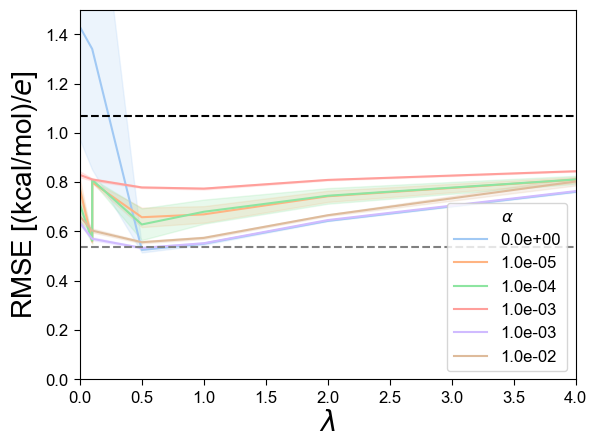

In [78]:
EX1PATH = "/home/boittier/pcbach/ff_energy/ff_energy/pydcm/tests/"
fname = "methanol"
combined_df, paired_df, standard, dfs = alpha_lambda_exp(EX1PATH, fname)
plt.xlim(0,4)
plt.ylim(0,1.5)

Index(['key1', 'key2', 'split', 'rmse_kernel', 'rmse_opt', '$\alpha$',
       '$\lambda$'],
      dtype='object')


(0.0, 1.5)

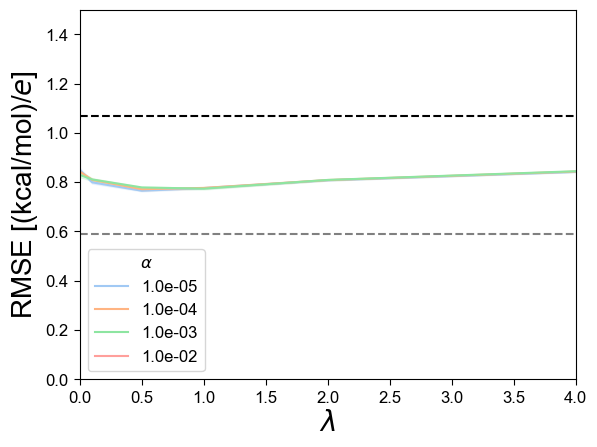

In [79]:
EX1PATH = "/home/boittier/pcbach/ff_energy/ff_energy/pydcm/tests/"
fname = "methanol_perm"
combined_df, paired_df, standard, dfs = alpha_lambda_exp(EX1PATH, fname)
plt.xlim(0,4)
plt.ylim(0,1.5)

In [77]:
standard

,Unnamed: 0,rmses,filename
0,0,1.223741,NaN
1,1,1.223741,NaN
2,2,1.223741,NaN
3,3,1.223741,NaN
4,4,1.223741,NaN
...,...,...,...
1075,1075,1.066738,NaN
1076,1076,1.066738,NaN
1077,1077,1.066738,NaN
1078,1078,1.066738,NaN


In [72]:
combined_df

,key,l2,alpha,rmse,class,uuid,_
0,methanol_perm_kernel_f291a966-6601-4461-a183-4...,4.0,0.01000,0.843294,methanol,f291a966-6601-4461-a183-42f5a2399277,kernel
1,methanol_perm_opt_f291a966-6601-4461-a183-42f5...,4.0,0.01000,0.759926,methanol,f291a966-6601-4461-a183-42f5a2399277,opt
2,methanol_perm_kernel_41693b9b-4ec6-4b33-860b-a...,4.0,0.01000,0.841823,methanol,41693b9b-4ec6-4b33-860b-a76542a2dcf1,kernel
3,methanol_perm_opt_41693b9b-4ec6-4b33-860b-a765...,4.0,0.01000,0.759926,methanol,41693b9b-4ec6-4b33-860b-a76542a2dcf1,opt
4,methanol_perm_kernel_a1701dd7-a882-440c-89cf-3...,4.0,0.01000,0.842844,methanol,a1701dd7-a882-440c-89cf-3d7de857f475,kernel
...,...,...,...,...,...,...,...
491,methanol_perm_opt_afca61e2-f8b6-4c21-846e-d266...,4.0,0.00001,0.759926,methanol,afca61e2-f8b6-4c21-846e-d266cd3a05b4,opt
492,methanol_perm_kernel_735bb2f2-3836-4468-b05c-7...,4.0,0.00001,0.837838,methanol,735bb2f2-3836-4468-b05c-7ecd95f4d148,kernel
493,methanol_perm_opt_735bb2f2-3836-4468-b05c-7ecd...,4.0,0.00001,0.759926,methanol,735bb2f2-3836-4468-b05c-7ecd95f4d148,opt
494,methanol_perm_kernel_0cb68c2c-e0e1-4d6a-baec-8...,4.0,0.00001,0.834397,methanol,0cb68c2c-e0e1-4d6a-baec-8be6db403291,kernel


In [73]:
list(set(paired_df["$\\alpha$"]))

[1e-05, 0.00010000000000000002, 0.009999999999999998, 0.001]

In [74]:
paired_df.sort_values("rmse_opt")

,key1,key2,split,rmse_kernel,rmse_opt,$\alpha$,$\lambda$
227,methanol_perm_kernel_6d1f677d-1701-41fc-b7ca-f...,methanol_perm_opt_6d1f677d-1701-41fc-b7ca-f3e7...,972,0.825360,0.454214,0.00100,0.0
134,methanol_perm_kernel_4ef4aef1-6932-4760-9f2a-c...,methanol_perm_opt_4ef4aef1-6932-4760-9f2a-c62c...,990,0.860481,0.454214,0.00001,0.0
226,methanol_perm_kernel_b4064326-3dad-46e5-ab41-1...,methanol_perm_opt_b4064326-3dad-46e5-ab41-1309...,972,0.875482,0.454230,0.00001,0.0
82,methanol_perm_kernel_0d311c8d-cbb2-469d-9d49-d...,methanol_perm_opt_0d311c8d-cbb2-469d-9d49-dc65...,990,0.847175,0.454230,0.00001,0.0
27,methanol_perm_kernel_f2c1d4dd-2a1b-4cb3-b490-9...,methanol_perm_opt_f2c1d4dd-2a1b-4cb3-b490-97c1...,990,0.850899,0.454239,0.00001,0.0
...,...,...,...,...,...,...,...
92,methanol_perm_kernel_735bb2f2-3836-4468-b05c-7...,methanol_perm_opt_735bb2f2-3836-4468-b05c-7ecd...,990,0.840366,0.759934,0.00001,4.0
171,methanol_perm_kernel_b4c74752-64d2-40ef-9fab-6...,methanol_perm_opt_b4c74752-64d2-40ef-9fab-687e...,990,0.843013,0.759934,0.00100,4.0
35,methanol_perm_kernel_7552d3f0-bf2c-4e4a-baad-f...,methanol_perm_opt_7552d3f0-bf2c-4e4a-baad-fa72...,900,0.845393,0.759934,0.00001,4.0
181,methanol_perm_kernel_cab2882c-ca1c-4cf6-80b8-a...,methanol_perm_opt_cab2882c-ca1c-4cf6-80b8-a4f3...,900,0.847183,0.759934,0.00100,4.0


# Select keys for comparison

In [75]:
i = -100
kk1 = paired_df["key1"].iloc[i]
print(kk1)
k1 = dfs[kk1]
kk2 = paired_df["key2"].iloc[i]
print(kk2)
k2 = dfs[kk2]
comb1 = comb_df(k1,k2,standard)



methanol_perm_kernel_b5608f36-82cc-42f4-b83f-34eca2dbf166_0.001_1.0
methanol_perm_opt_b5608f36-82cc-42f4-b83f-34eca2dbf166_1.0


AttributeError: 'float' object has no attribute 'split'

In [76]:
k1

,Unnamed: 0,rmse,pkl,class,alpha,uuid,l2,type,jobname
0,0,0.660200,pkls/b5608f36-82cc-42f4-b83f-34eca2dbf166/gaus...,train,0.001,b5608f36-82cc-42f4-b83f-34eca2dbf166,1.0,scan,gaussian_0_methanol_perm_0_pbe0_adz_esp.pkl
1,1,0.696547,pkls/b5608f36-82cc-42f4-b83f-34eca2dbf166/gaus...,test,0.001,b5608f36-82cc-42f4-b83f-34eca2dbf166,1.0,scan,gaussian_0_methanol_perm_1_pbe0_adz_esp.pkl
2,2,0.824945,pkls/b5608f36-82cc-42f4-b83f-34eca2dbf166/gaus...,test,0.001,b5608f36-82cc-42f4-b83f-34eca2dbf166,1.0,scan,gaussian_0_methanol_perm_2_pbe0_adz_esp.pkl
3,3,0.767359,pkls/b5608f36-82cc-42f4-b83f-34eca2dbf166/gaus...,test,0.001,b5608f36-82cc-42f4-b83f-34eca2dbf166,1.0,scan,gaussian_0_methanol_perm_3_pbe0_adz_esp.pkl
4,4,0.773307,pkls/b5608f36-82cc-42f4-b83f-34eca2dbf166/gaus...,test,0.001,b5608f36-82cc-42f4-b83f-34eca2dbf166,1.0,scan,gaussian_0_methanol_perm_4_pbe0_adz_esp.pkl
...,...,...,...,...,...,...,...,...,...
1075,1075,0.644054,pkls/b5608f36-82cc-42f4-b83f-34eca2dbf166/gaus...,test,0.001,b5608f36-82cc-42f4-b83f-34eca2dbf166,1.0,scan,gaussian_9_methanol_perm_1_pbe0_adz_esp.pkl
1076,1076,0.747848,pkls/b5608f36-82cc-42f4-b83f-34eca2dbf166/gaus...,test,0.001,b5608f36-82cc-42f4-b83f-34eca2dbf166,1.0,scan,gaussian_9_methanol_perm_2_pbe0_adz_esp.pkl
1077,1077,0.889486,pkls/b5608f36-82cc-42f4-b83f-34eca2dbf166/gaus...,test,0.001,b5608f36-82cc-42f4-b83f-34eca2dbf166,1.0,scan,gaussian_9_methanol_perm_3_pbe0_adz_esp.pkl
1078,1078,0.947331,pkls/b5608f36-82cc-42f4-b83f-34eca2dbf166/gaus...,test,0.001,b5608f36-82cc-42f4-b83f-34eca2dbf166,1.0,scan,gaussian_9_methanol_perm_4_pbe0_adz_esp.pkl


In [ ]:
paired_df["key1"].iloc[11]

In [ ]:
i = 0
k1 = dfs[paired_df["key1"].iloc[i]].copy()
k2 = dfs[paired_df["key2"].iloc[i]].copy()
comb2 = comb_df(k1,k2,standard)

In [ ]:
dg1 = dist_plot(comb1)
dg2 = dist_plot(comb2)
ax = pw.Brick(figsize=(3,3))
a = rmse_plot(paired_df, standard, ax=ax)
a.set_ylim(0,1)
a.set_xlim(0,4)

a.set_index("C", fontsize=25)
dg2.set_index("\nA", fontsize=25)
dg1.set_index("\nB", fontsize=25)

In [ ]:
dg2 | dg1 | a

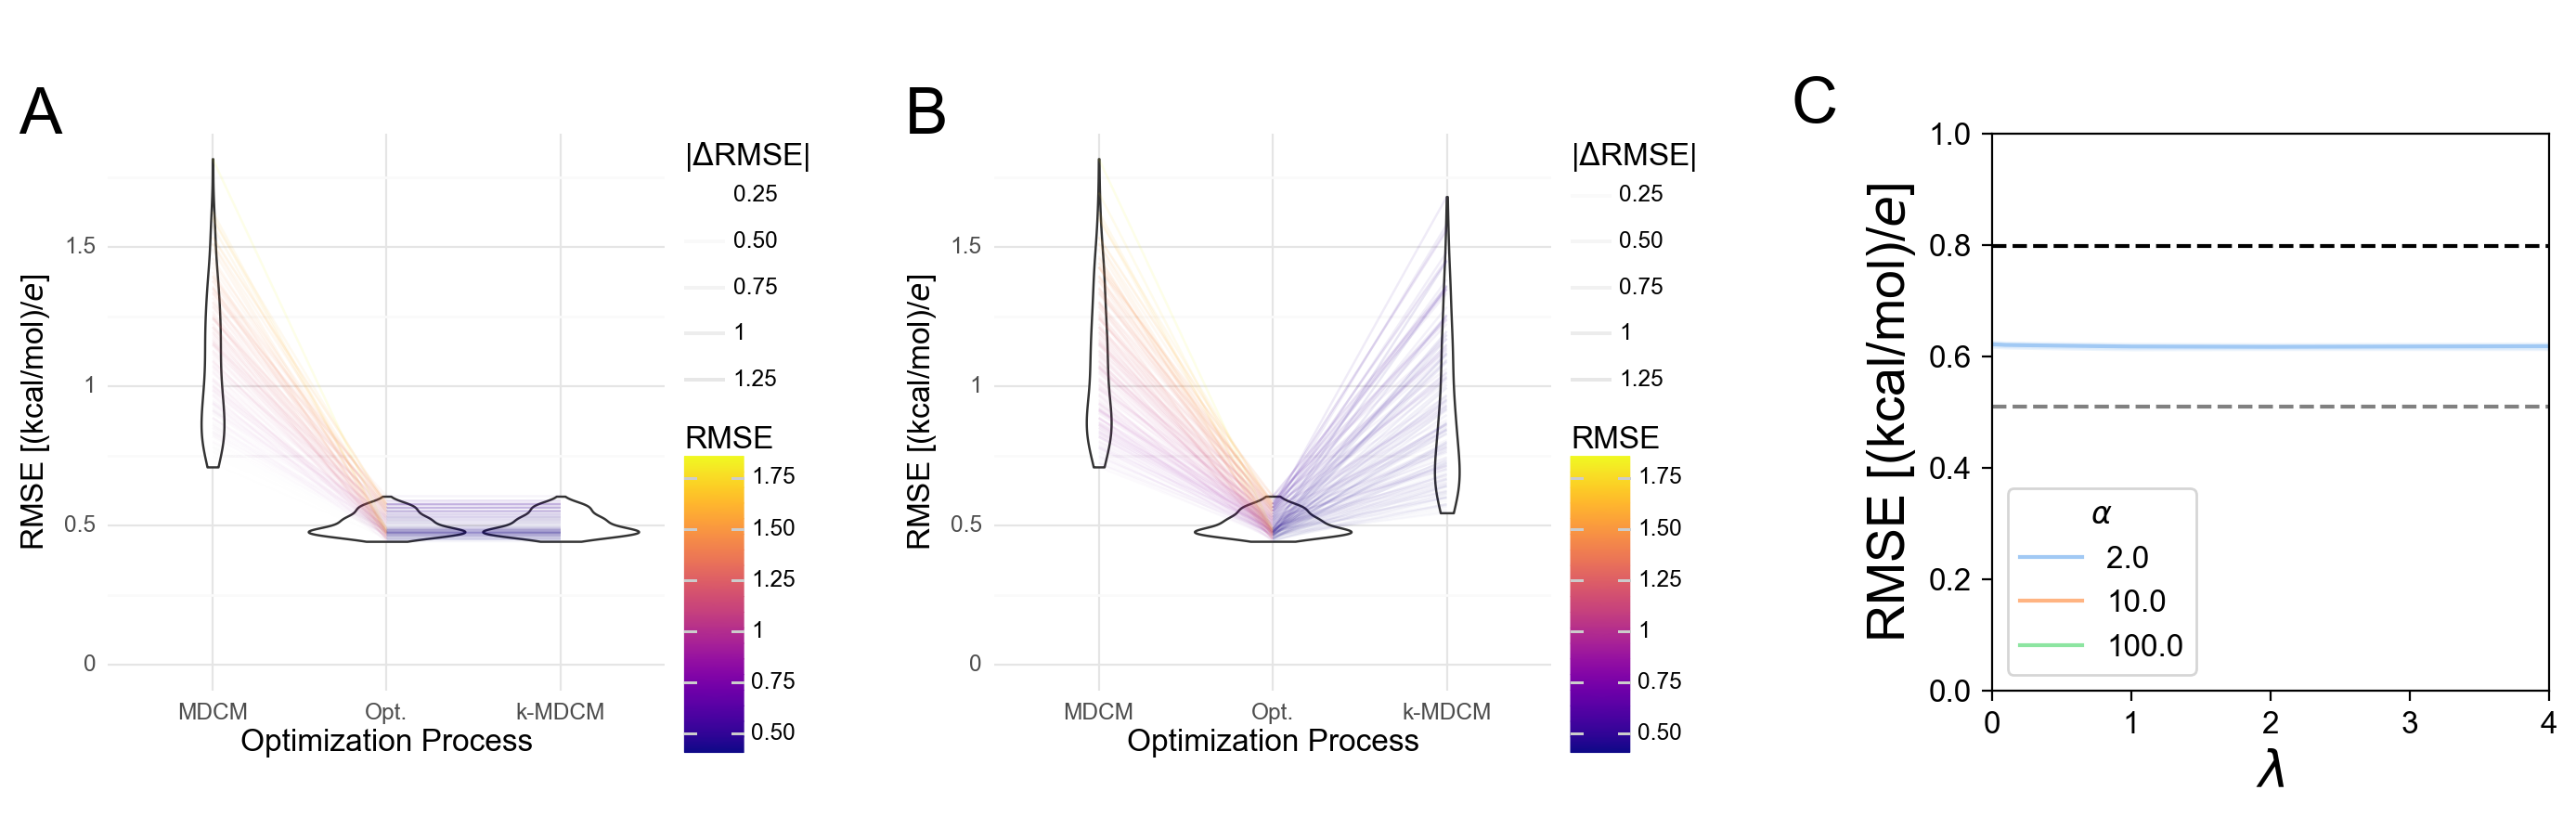

In [669]:
fig3 = (dg2 | dg1 | a)
fig3

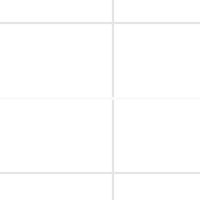

In [670]:
fig3.savefig("fig3_draft.pdf")

In [659]:
pkl_path = "/home/boittier/Documents/phd/ff_energy/experiments/kernel_fit/pkls"
pkl_path = "/home/boittier/pcbach/ff_energy/ff_energy/pydcm/tests/models/"
pkl_path = "/home/boittier/Documents/phd/ff_energy/ff_energy/pydcm/tests/models/"

In [660]:
pkls = list(Path(pkl_path).glob("*"))


In [665]:
k = pd.read_pickle(pkls[0])

In [666]:
k.uuid

'f47c9573-8a9a-4044-9e8c-dbb75dc102bb'

# Gather global charges

In [869]:
from ff_energy.pydcm.data_helper import read_global_charges
from ff_energy.pydcm.plotting import values_to_colors

##  from XYZ files

In [885]:

path_to_rmse = "/home/boittier/Documents/phd/ff_energy/cubes/methanol/"
# ex_uuid = "8798cadc-9019-4d8a-9e30-40a45c05ff26"
# ex_uuid = "e8451edf-d21c-442c-b41e-2f71985ce8e5"
ex_uuid = "a379cba0-3858-4cac-a137-abc9661f446b"

def analyse_global_charges(path_to_rmse, ex_uuid, run="rmse", lim=None):
    rmse_path = Path(path_to_rmse)
    cxyzs = list(rmse_path.glob(f"*/*{run}*{ex_uuid}*.xyz"))
    cxyzs_np = [read_global_charges(x) for x in cxyzs]
    # get the rmse
    rmses = [_[1] for _ in cxyzs_np]
    # get the global positions
    cxyzs_np = [_[0] for _ in cxyzs_np]
    # create the array
    shape_ = cxyzs_np[0].shape
    Nstructs = len(cxyzs_np)
    NC = shape_[0]//4

    colors, scalMap = values_to_colors(rmses, lim=lim)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i,_ in enumerate(cxyzs_np):
        _ = np.moveaxis(_,0,-1)
        orthographic_plot(_[0], _[1], _[2], ax=ax, c=colors[i])
        
    plt.colorbar(scalMap)
        
    return cxyzs_np, rmses
    

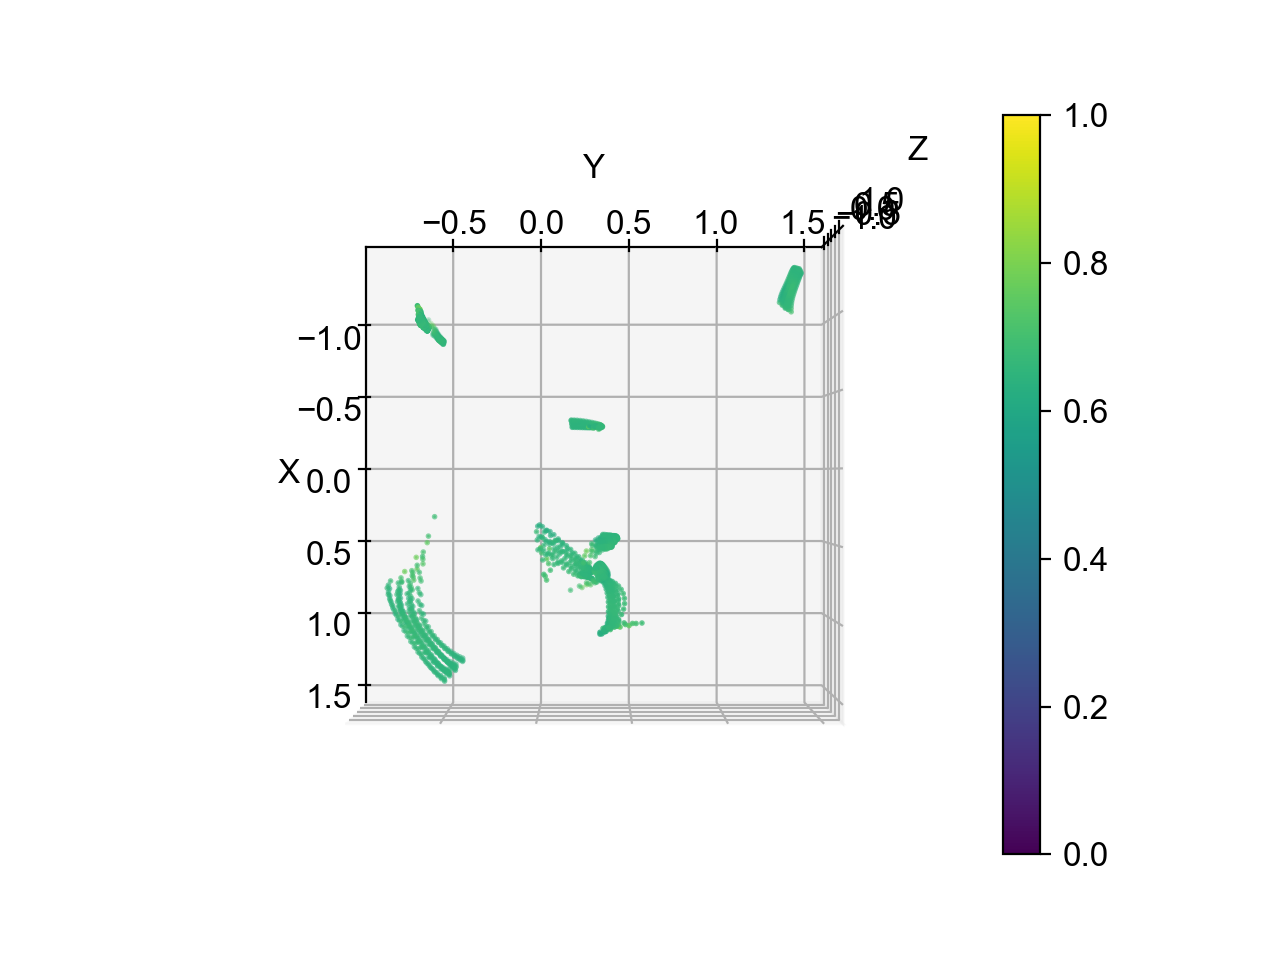

In [886]:
_,_ = analyse_global_charges(path_to_rmse, ex_uuid, lim=[0,1])

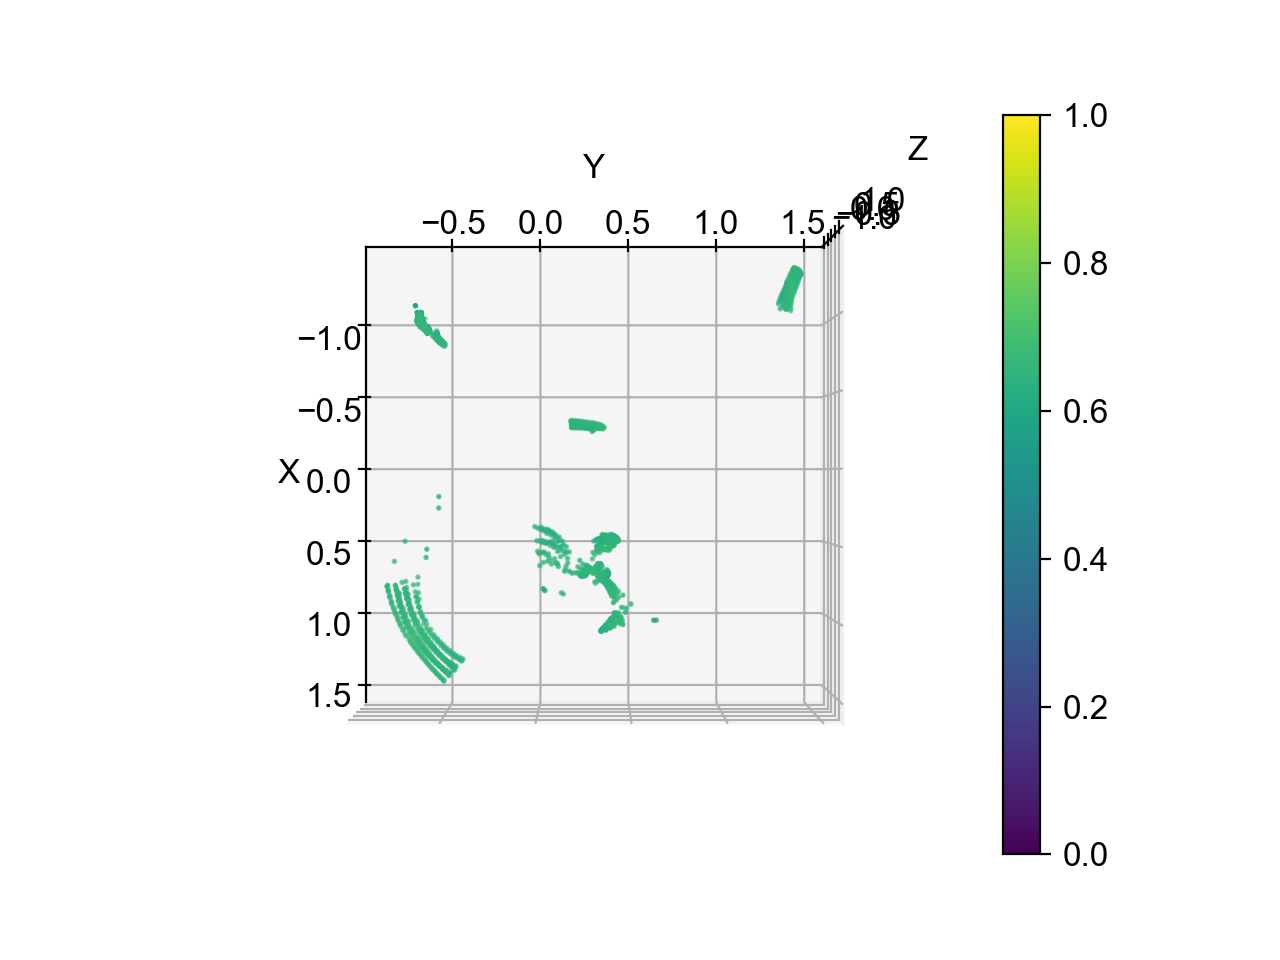

In [888]:
_,_ = analyse_global_charges(path_to_rmse, ex_uuid, run="opt", lim=[0,1])

In [825]:
cxyzs[0], cxyzs[1]

(PosixPath('/home/boittier/Documents/phd/ff_energy/cubes/methanol/scan/gaussian_53_meoh_pbe0_adz_esp.cube_methanol_rmse-e8451edf-d21c-442c-b41e-2f71985ce8e5.xyz.npy'),
 PosixPath('/home/boittier/Documents/phd/ff_energy/cubes/methanol/scan/gaussian_173_meoh_pbe0_adz_esp.cube_methanol_rmse-e8451edf-d21c-442c-b41e-2f71985ce8e5.xyz.npy'))

In [826]:
# cxyzs_np

In [827]:
global_cs[1] == global_cs[3]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [732]:
from ff_energy.pydcm.plotting import orthographic_plot


In [18]:
_ = global_cs.copy()
_ = np.moveaxis(_, 0, -1)
_ = np.moveaxis(_,0,-1)

NameError: name 'global_cs' is not defined

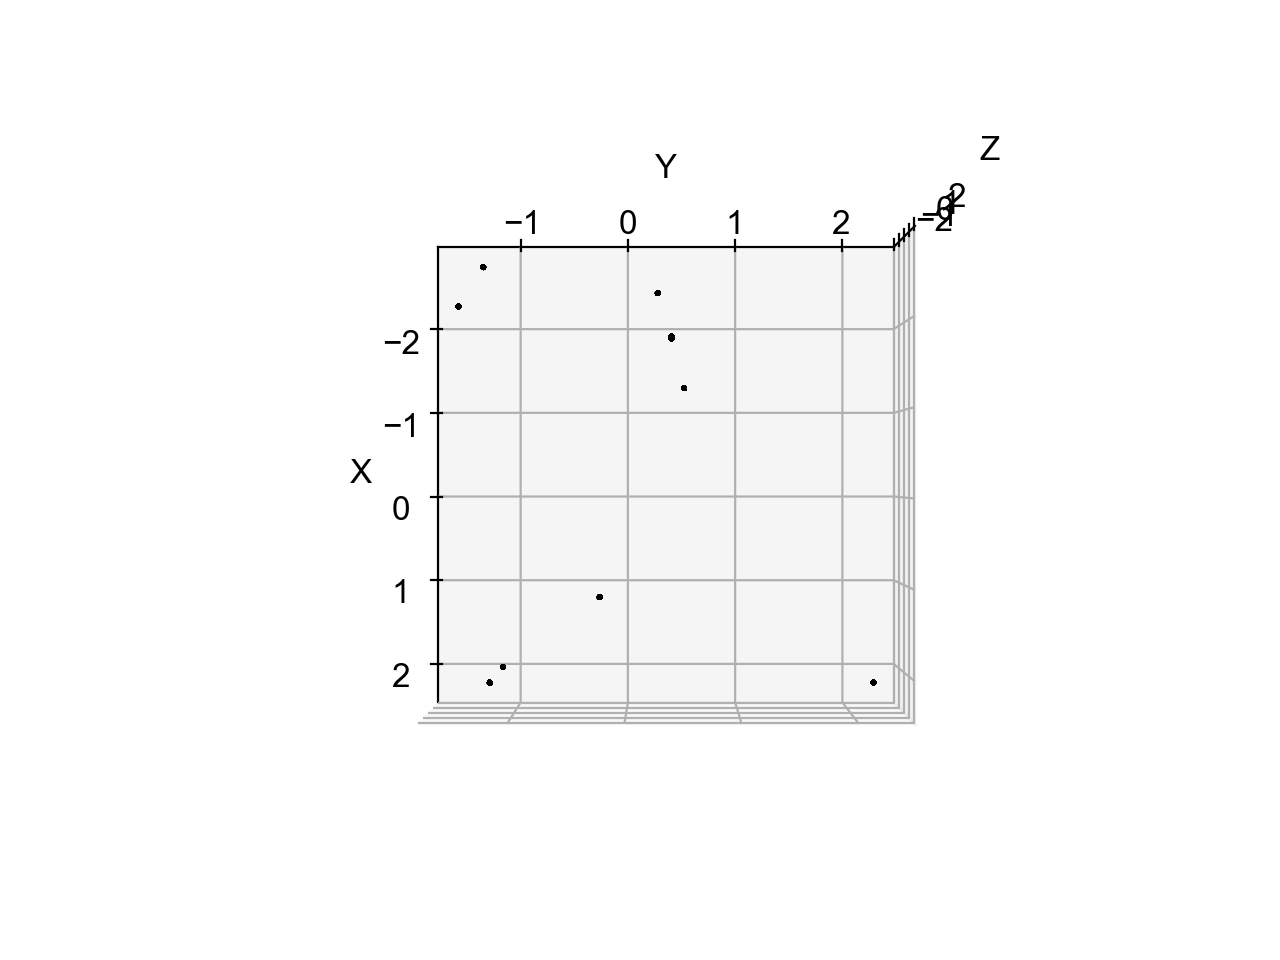

In [746]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for __ in range(180):
    orthographic_plot(*_[:,__,:], ax=ax)

## From global saves

In [821]:
# test_path = "/home/boittier/Documents/phd/ff_energy/cubes/clcl/methanol/1.0/gaussian_0_meoh_pbe0_adz_esp_l2_1.0e+00_rmse_0.5895_rmsd_0.1606_global_charges.obj"
test_path = "/home/boittier/Documents/phd/ff_energy/cubes/clcl/methanol/1.0/"
tpath = Path(test_path)
files = list(tpath.glob("*global*obj"))
# print(files)
pd.read_pickle(files[0])

DCMPY: /home/boittier/Documents/phd/ff_energy/ff_energy/pydcm/dcm.py
HOME: /home/boittier
FFE: /home/boittier/Documents/phd/ff_energy


IndexError: list index out of range

In [784]:
# pd.read_pickle(files[1])
files[0]

PosixPath('/home/boittier/Documents/phd/ff_energy/cubes/clcl/methanol/1.0/gaussian_0_meoh_pbe0_adz_esp_l2_1.0e+00_rmse_0.5895_rmsd_0.1606_global_charges.obj')

In [841]:
global_chgs = []
indexs = []
files.sort(key= lambda x: int(x.stem.split("_")[1]))
for i, f in enumerate(files):
    spl = f.stem.split("_")
    rmse_idx = spl.index("rmse") + 1
    rmse = float(spl[rmse_idx])
    if rmse < 2:
        global_chgs.append(
            pd.read_pickle(files[i])
        )
        indexs.append(
            int(spl[1])
        )
